In [1]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()

## BER Graph

#### Examine 5 runs for dataset

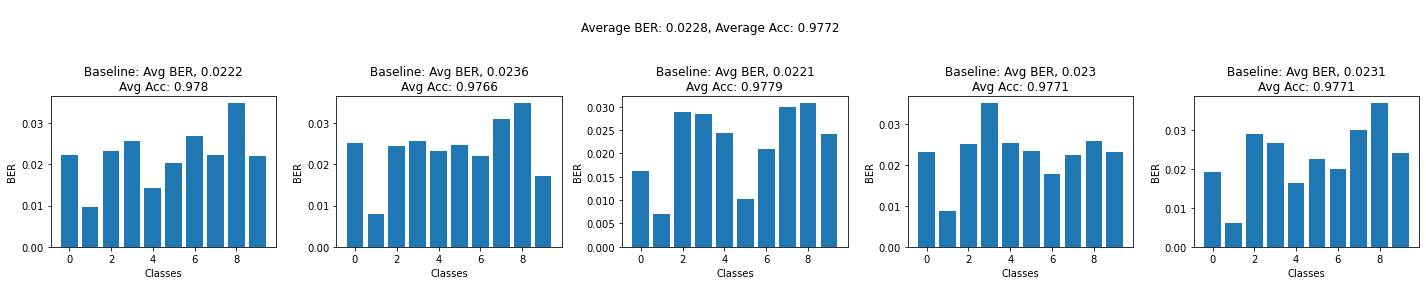

In [11]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(1,5)
i=0; j=0

# folder_dict={"DF":"DF", "Baseline":"Baseline", "Weight":"Weight","Grad":"Grad",
#              "Phases-Simul":"Phases", "Phases-ThresholdedSimul":"Phases", "NFS":"NFS"} #model: folder
folder_dict={"Baseline":"Baseline", "DF":"DF", "NFS":"NFS","Weight":"Weight", "Grad":"Grad"}
model="Baseline"
epoch=100

# fig.set_figheight(5)
fig.set_figwidth(20)

avg_ber= []
avg_acc= []
for folder in range(5):
    ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{folder_dict[model]}/MNIST-{model}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{folder_dict[model]}/MNIST-{model}-v_dict-{epoch}.pkl", "rb") )
    axes[j].bar([i for i in range(len(ber))], ber)
    axes[j].set_title(f"{model}: Avg BER, {round(np.mean(ber),4)}\nAvg Acc: {round(dictionary['accuracy'],4)}")
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
    
    avg_ber.append(np.mean(ber))
    avg_acc.append(np.mean(dictionary["macro avg"]["f1-score"]))
plt.suptitle(f"\nAverage BER: {round(np.mean(avg_ber),4)}, Average Acc: {round(np.mean(avg_acc), 4)}\n" )

plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

In [8]:
from scipy.stats import ttest_ind
p_ber=[0.0226,0.0251,0.0247,0.0247,0.0243]
p_f1=[0.9774,0.975,0.9752,0.9754,0.9757]
n_ber=[0.0222,0.0236,0.0221,0.023,0.0231]
n_f1=[0.978,0.9766,0.9779,0.9771,0.9771]



if 0.5< np.std(n_f1)/ np.std(p_f1) < 2:
    res= ttest_ind(n_f1, p_f1)
else:
    res= ttest_ind(n_f1, p_f1, equal_var=False)
res

Ttest_indResult(statistic=3.161043118774438, pvalue=0.013373924010535115)

## Baseline

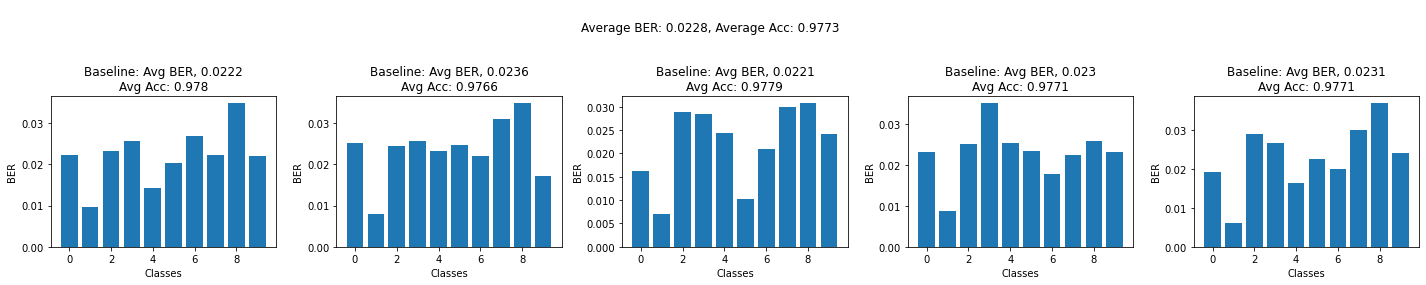

# DF

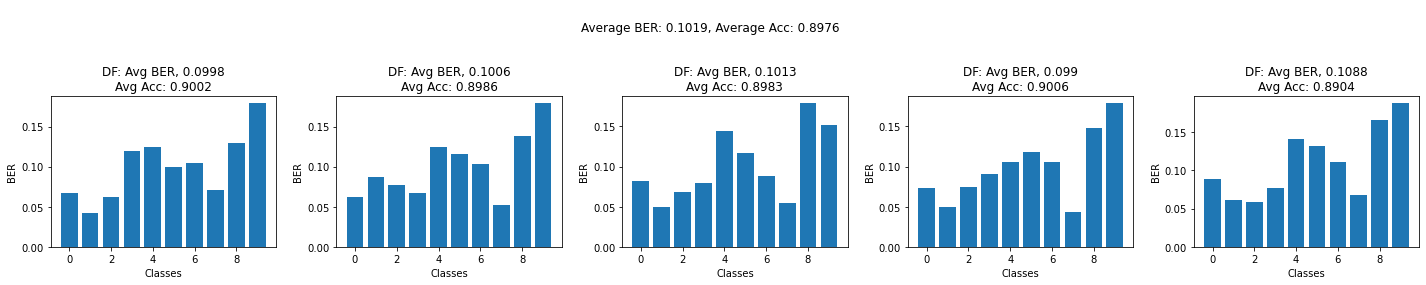

# NFS

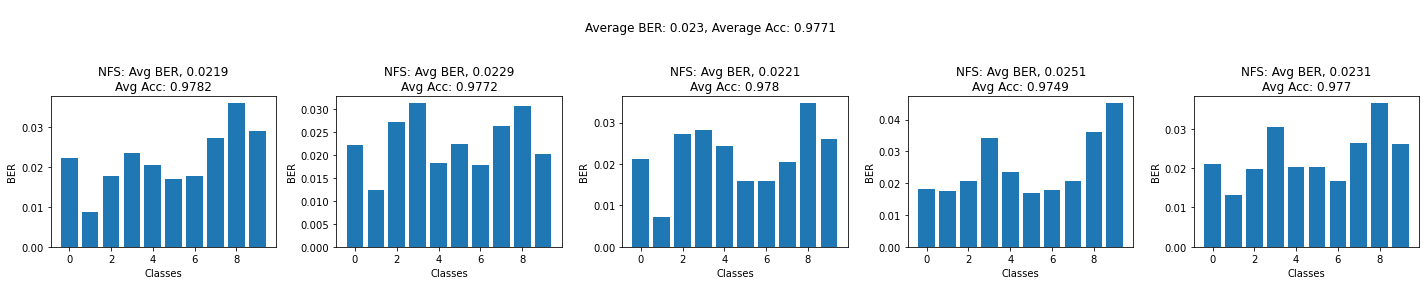

# Weight

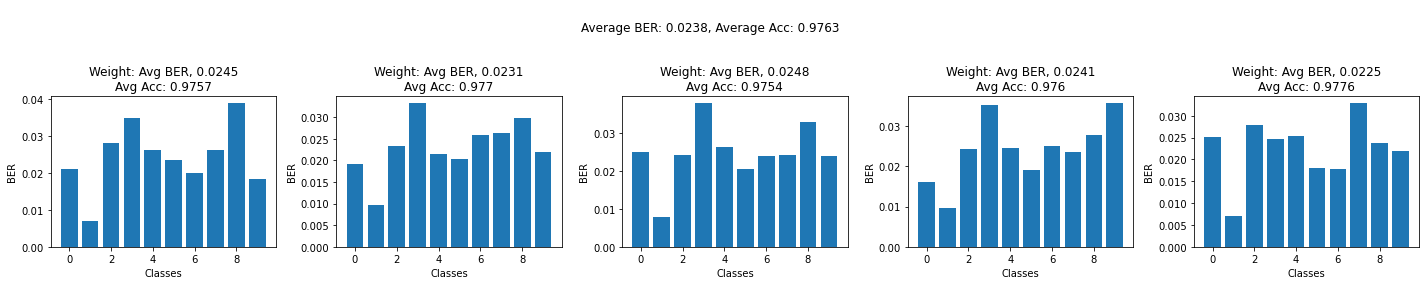

# Grad

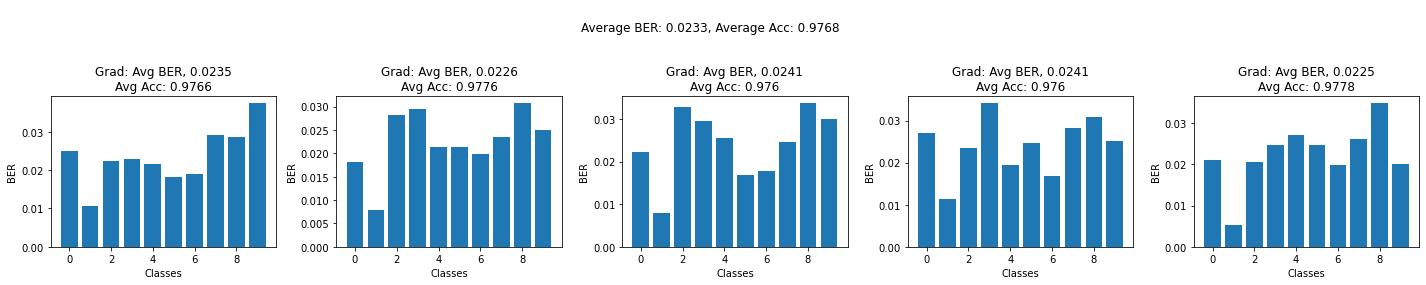

## Subset

## RS: save subset

In [11]:
import pickle
import os
epoch=100
for folder in range(5):
    for percentile in range(10,100,10):
        rs=[]
        dictionaries=[]
        for rs_folder in range(5):
            ber= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/RS/RS{rs_folder}/MNIST-subset-RS{rs_folder}-{percentile}-ber-{epoch}.pkl", "rb"))
            rs.append(ber)
            
            dictionary= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/RS/RS{rs_folder}/MNIST-subset-RS{rs_folder}-{percentile}-v_dict-{epoch}.pkl", "rb")).copy()
            dictionaries.append({"accuracy":dictionary["accuracy"], "macro avg":{"precision": dictionary["macro avg"]["precision"], "recall": dictionary["macro avg"]["recall"], "f1-score": dictionary["macro avg"]["f1-score"]}})        
  
        if not os.path.exists(f"./experiments/MNIST/exp_log{folder}/RS/subset"):
            os.mkdir(f"./experiments/MNIST/exp_log{folder}/RS/subset")
#         pickle.dump(np.array(rs).mean(0), open(f"./experiments/MNIST/exp_log{folder}/RS/subset/MNIST-subset-RS-{percentile}-ber-{epoch}.pkl", "wb"))
        dictionary= {"accuracy":np.mean([i['accuracy'] for i in dictionaries]), "macro avg":{"precision": np.mean([i['macro avg']['precision'] for i in dictionaries]), "recall":np.mean([i['macro avg']['recall'] for i in dictionaries]), "f1-score":np.mean([i['macro avg']['f1-score'] for i in dictionaries])} }

        pickle.dump(dictionary, open(f"./experiments/MNIST/exp_log{folder}/RS/subset/MNIST-subset-RS-{percentile}-v_dict-{epoch}.pkl", "wb"))        

## RS

In [31]:
dictionary['macro avg']['f1-score']

0.8918152805168879

baseline ber 0.022790830345614365
baseline f1score 0.977177067980555
performance BER RR [0.02390661 0.02508129 0.02593896 0.02799973 0.03029731 0.0361722
 0.04434747 0.06104961 0.10837823]
performance f1 RR [0.97607689 0.97488416 0.97403351 0.97196444 0.9696713  0.96380261
 0.95561127 0.93887056 0.89145102]


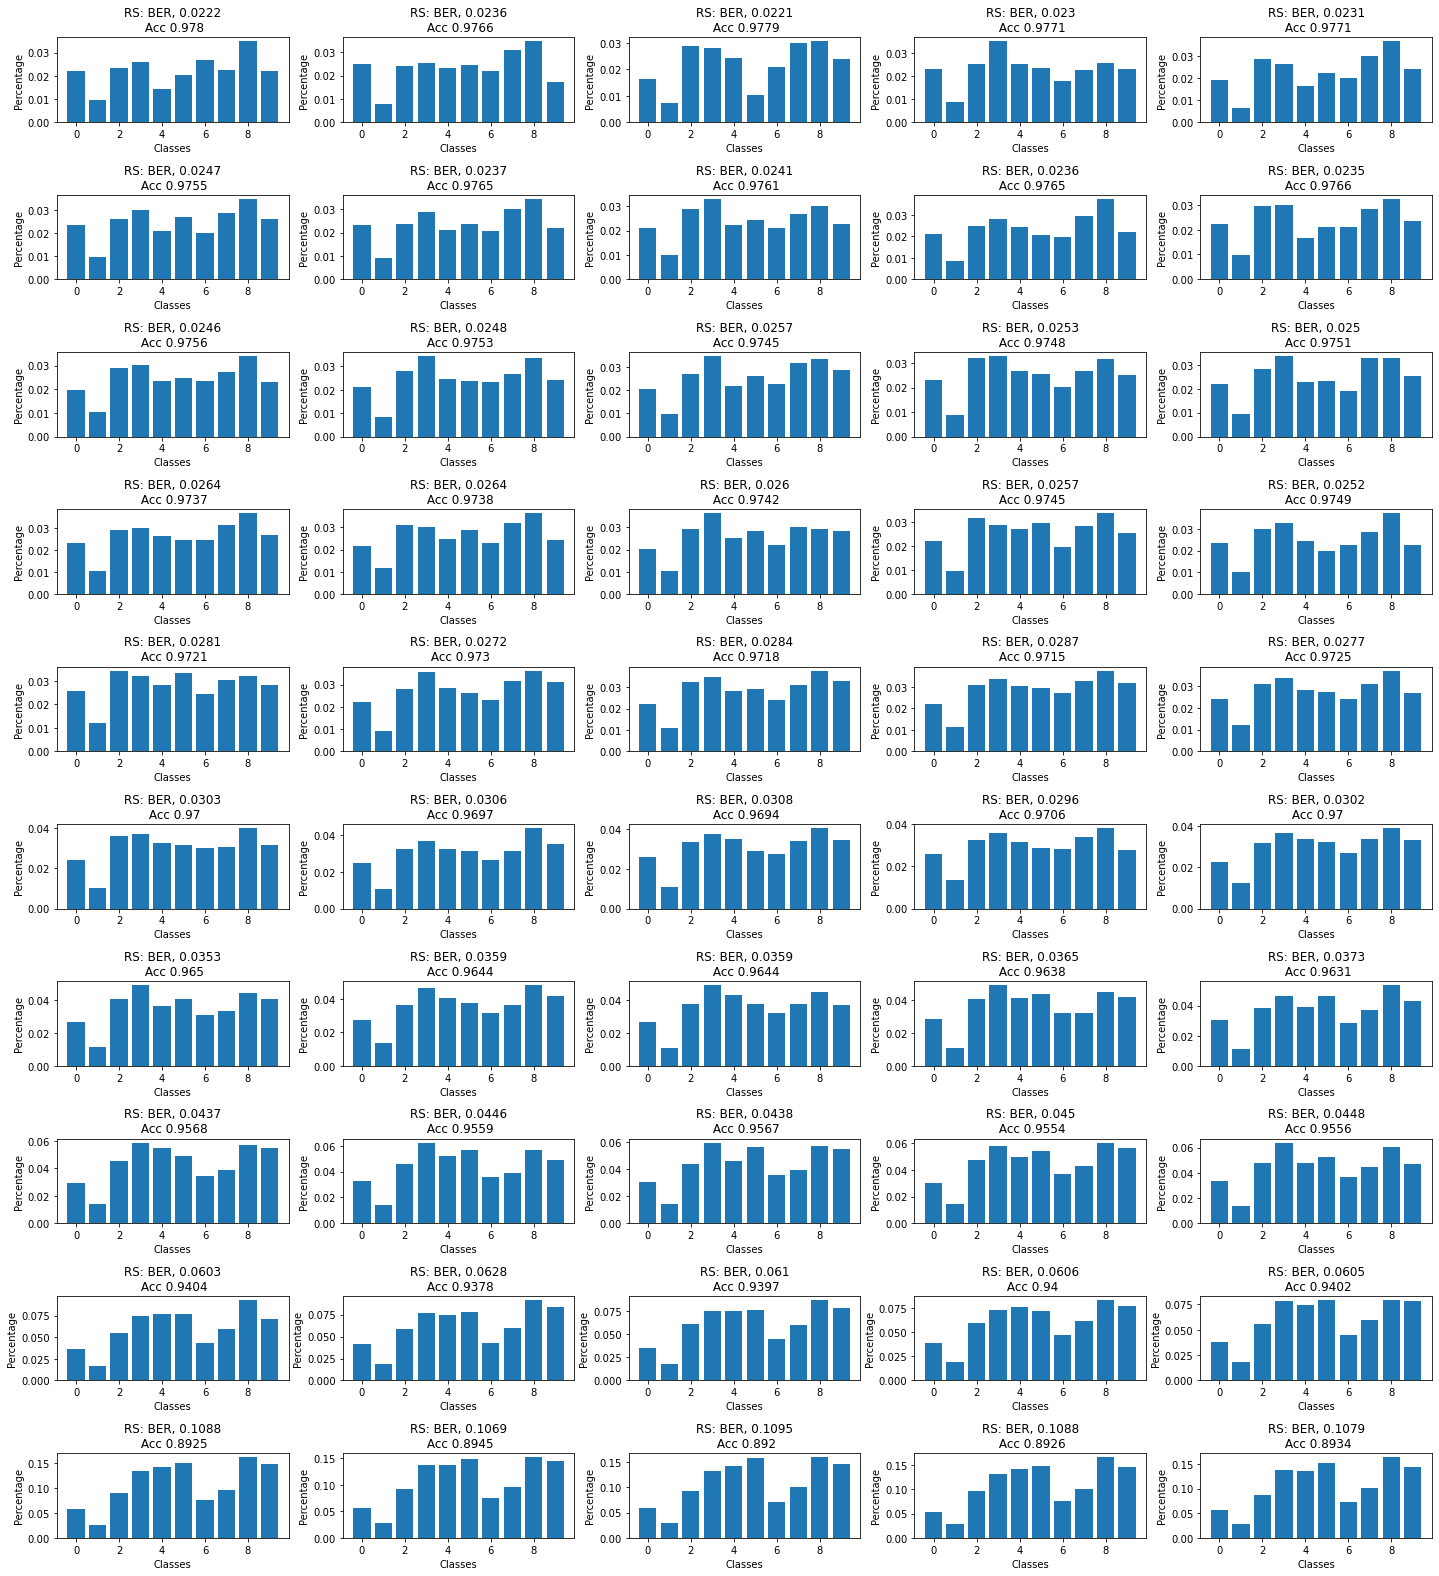

In [33]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="RS"
epoch=100

fig.set_figheight(22)
fig.set_figwidth(20)
rs_base_ber_avg=[]; rs_base_f1_avg=[]
for folder in range(5):
    ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1
    
    rs_base_ber_avg.append(np.mean(ber))
    rs_base_f1_avg.append(dictionary['macro avg']['f1-score'])
print("baseline ber", np.array(rs_base_ber_avg).mean())
print("baseline f1score", np.array(rs_base_f1_avg).mean())

rs_ber_avg=[]; rs_f1_avg=[]
i=1; j=0
for folder in range(5):
    bers=[]; f1s=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")

        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        
        bers.append(np.mean(ber))
        f1s.append(dictionary['macro avg']['f1-score'])
    j += 1; i=1
    rs_ber_avg.append(bers)
    rs_f1_avg.append(f1s)
    
print("performance BER RR",np.stack(rs_ber_avg).mean(axis=0))
print("performance f1 RR",np.stack(rs_f1_avg).mean(axis=0))
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Weight

baseline ber 0.023789838749834428
baseline f1score 0.9761708465974159
performance BER RR [0.02703325 0.03740586 0.04899559 0.05721997 0.0983273  0.15383462
 0.26376814 0.38286914 0.41816333]
performance f1 RR [0.97294208 0.96247823 0.95091857 0.94262968 0.90128937 0.84521708
 0.73058102 0.5474905  0.36972669]


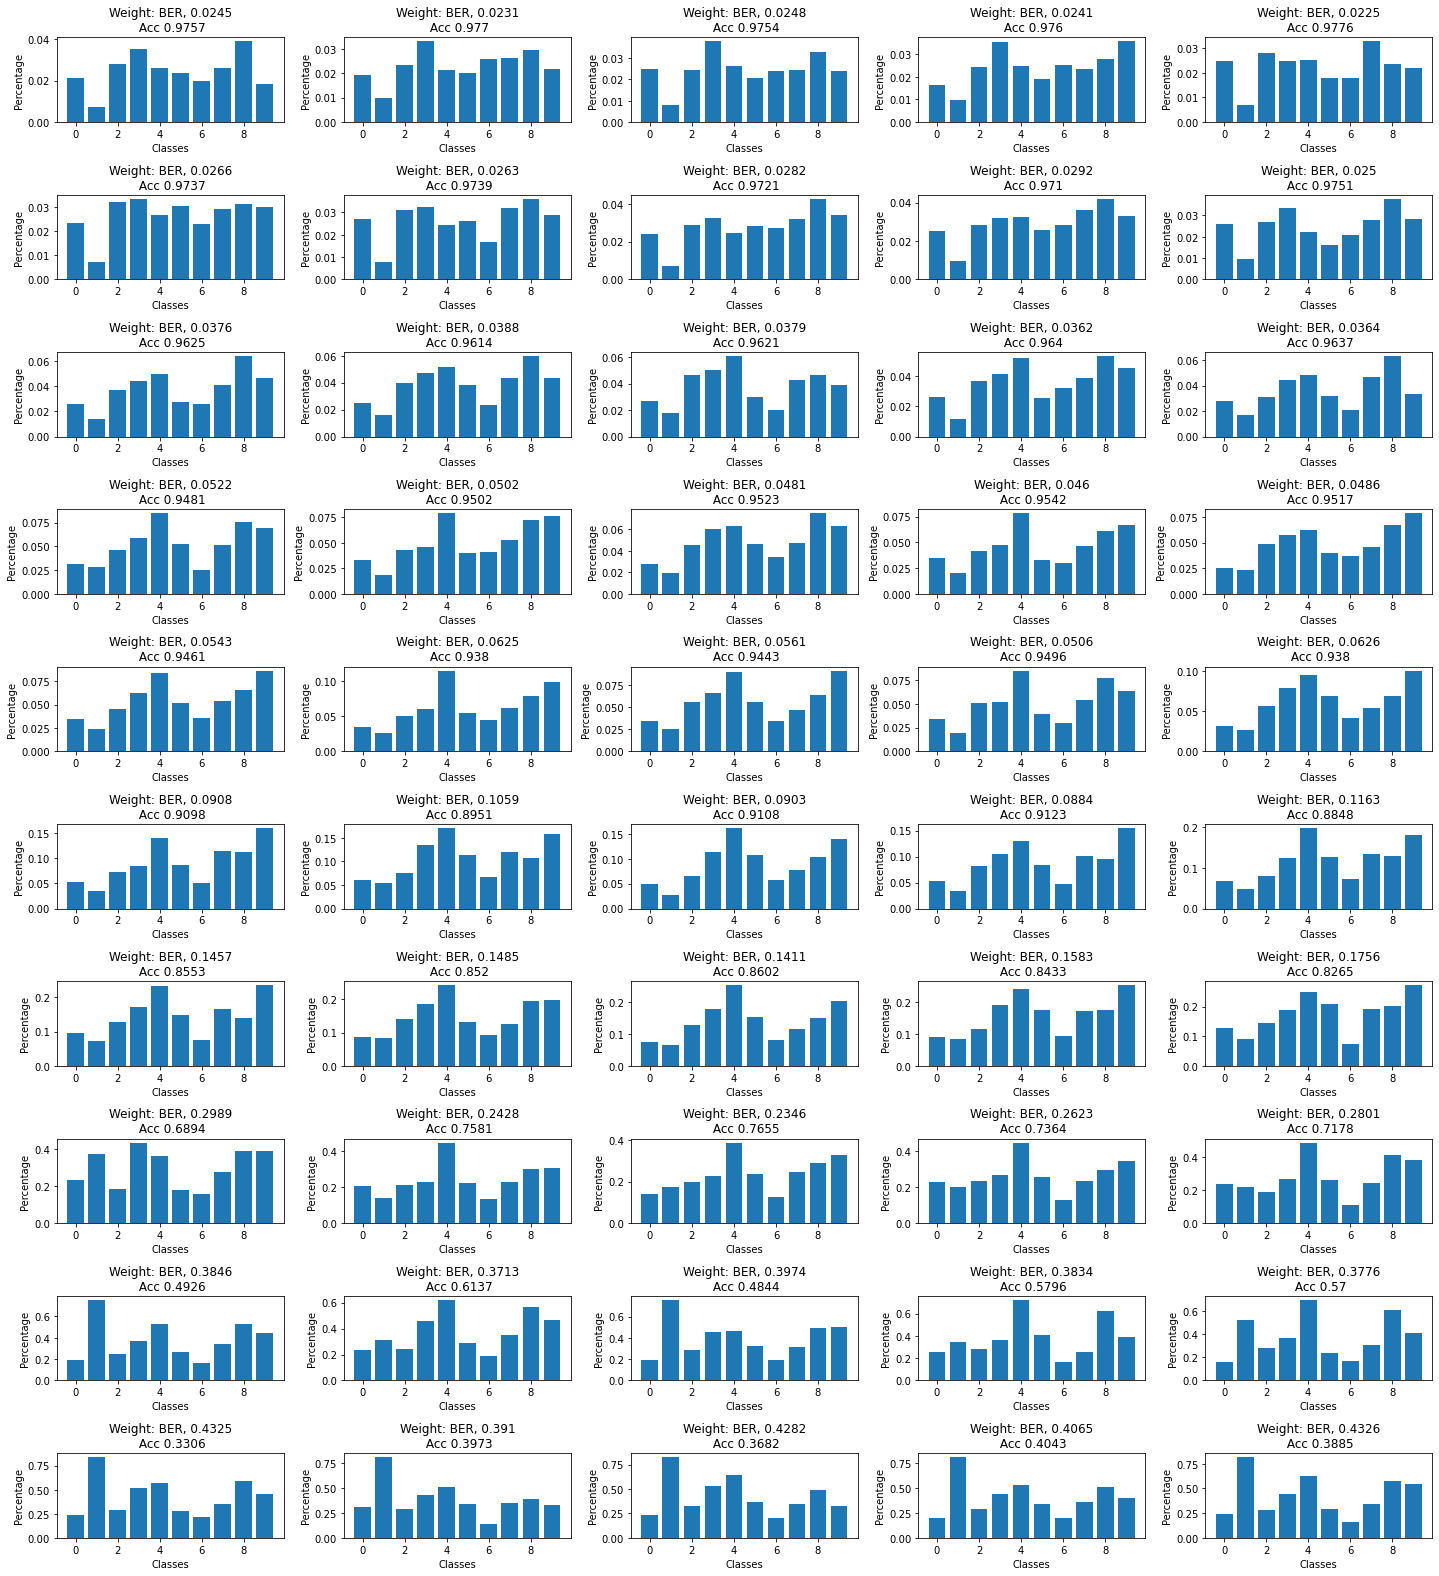

In [34]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="Weight"
epoch=100
weight_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)
iew_base_ber_avg=[]; iew_base_f1_avg=[]
for folder in range(5):
    ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1
    
    iew_base_ber_avg.append(np.mean(ber))
    iew_base_f1_avg.append(dictionary['macro avg']['f1-score'])
print("baseline ber", np.array(iew_base_ber_avg).mean())
print("baseline f1score", np.array(iew_base_f1_avg).mean())


iew_ber_avg=[]; iew_f1_avg=[]
i=1; j=0
for folder in range(5):
    bers=[]; f1s=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")

        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        
        bers.append(np.mean(ber))
        f1s.append(dictionary['macro avg']['f1-score'])
    j += 1; i=1
    iew_ber_avg.append(bers)
    iew_f1_avg.append(f1s)
    
print("performance BER RR",np.stack(iew_ber_avg).mean(axis=0))
print("performance f1 RR",np.stack(iew_f1_avg).mean(axis=0))
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

### Z-score

In [166]:
import scipy.stats as st
for i in range(weight_ber.shape[1]):
    ber_list=np.array(weight_ber[:,i])
    print(i+1, ber_list)
    count=0
    for value in weight_ber[:, i]:
        z_score= (value - ber_list.mean()) / ber_list.std()
        print(f"{i+1}.{count}")
        print("cdf:", st.norm.cdf(z_score))
        if st.norm.cdf(z_score) > 0.5:
            print("from mean", st.norm.cdf(z_score)-0.5) # % from the mean
        else:
            print("from mean", 0.5-st.norm.cdf(z_score))
        print()
        count += 1

1 [0.0924 0.093  0.0907 0.0871 0.0922]
1.0
cdf: 0.7323526109424786
from mean 0.2323526109424786

1.1
cdf: 0.8164015593960692
from mean 0.3164015593960692

1.2
cdf: 0.4291774603965564
from mean 0.07082253960344359

1.3
cdf: 0.030795791258797636
from mean 0.4692042087412024

1.4
cdf: 0.7005603896980975
from mean 0.20056038969809753

2 [0.1027 0.0986 0.094  0.1063 0.1093]
2.0
cdf: 0.5381147354580532
from mean 0.03811473545805322

2.1
cdf: 0.25502611197964803
from mean 0.24497388802035197

2.2
cdf: 0.06613593184567922
from mean 0.43386406815432077

2.3
cdf: 0.775810984077399
from mean 0.275810984077399

2.4
cdf: 0.9049278487300467
from mean 0.4049278487300467

3 [0.1095 0.112  0.1043 0.1059 0.1111]
3.0
cdf: 0.6237982583626125
from mean 0.12379825836261249

3.1
cdf: 0.8758508294213916
from mean 0.3758508294213916

3.2
cdf: 0.07640283289267176
from mean 0.42359716710732825

3.3
cdf: 0.18600410904403358
from mean 0.3139958909559664

3.4
cdf: 0.8030164208160284
from mean 0.3030164208160284

4 

## DF

In [5]:
for folder in range(5):
    w= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/DF/MNIST-DF-w-100.pkl","rb"))
    print(np.percentile(w, [10,20,30,40,50,60,70,80,90]))

[-2.98056390e-05 -1.50630560e-05 -6.93440611e-06 -3.47122008e-07
  4.53018424e-06  1.25641589e-05  2.31742149e-05  5.44746952e-05
  2.50702124e-04]
[-3.31115240e-05 -1.54180674e-05 -6.43523454e-06 -1.18237972e-06
  5.12164547e-06  1.14351382e-05  2.09736041e-05  6.42359737e-05
  2.43850068e-04]
[-3.09162315e-05 -1.46965520e-05 -6.70783857e-06  4.83206811e-08
  5.98116321e-06  1.39208747e-05  2.59662207e-05  6.83648861e-05
  2.83321645e-04]
[-3.27783477e-05 -1.53648212e-05 -8.72835635e-06 -1.79494609e-06
  4.30259229e-06  1.18008007e-05  2.61990779e-05  7.77628433e-05
  2.91477615e-04]
[-2.85445241e-05 -1.21933273e-05 -3.55924876e-06  1.19975200e-06
  6.95956874e-06  1.53955236e-05  3.38087841e-05  1.04798620e-04
  2.88759827e-04]


baseline ber 0.1019148097865058
baseline f1 0.896346905987544
ber RR [0.02470577 0.02562511 0.0268683  0.02583098 0.02716279 0.02866865
 0.03298966 0.03772763 0.05439789]
f1 RR [0.97527865 0.97433023 0.97309022 0.97413153 0.97276215 0.97127473
 0.96694154 0.96221012 0.94554286]


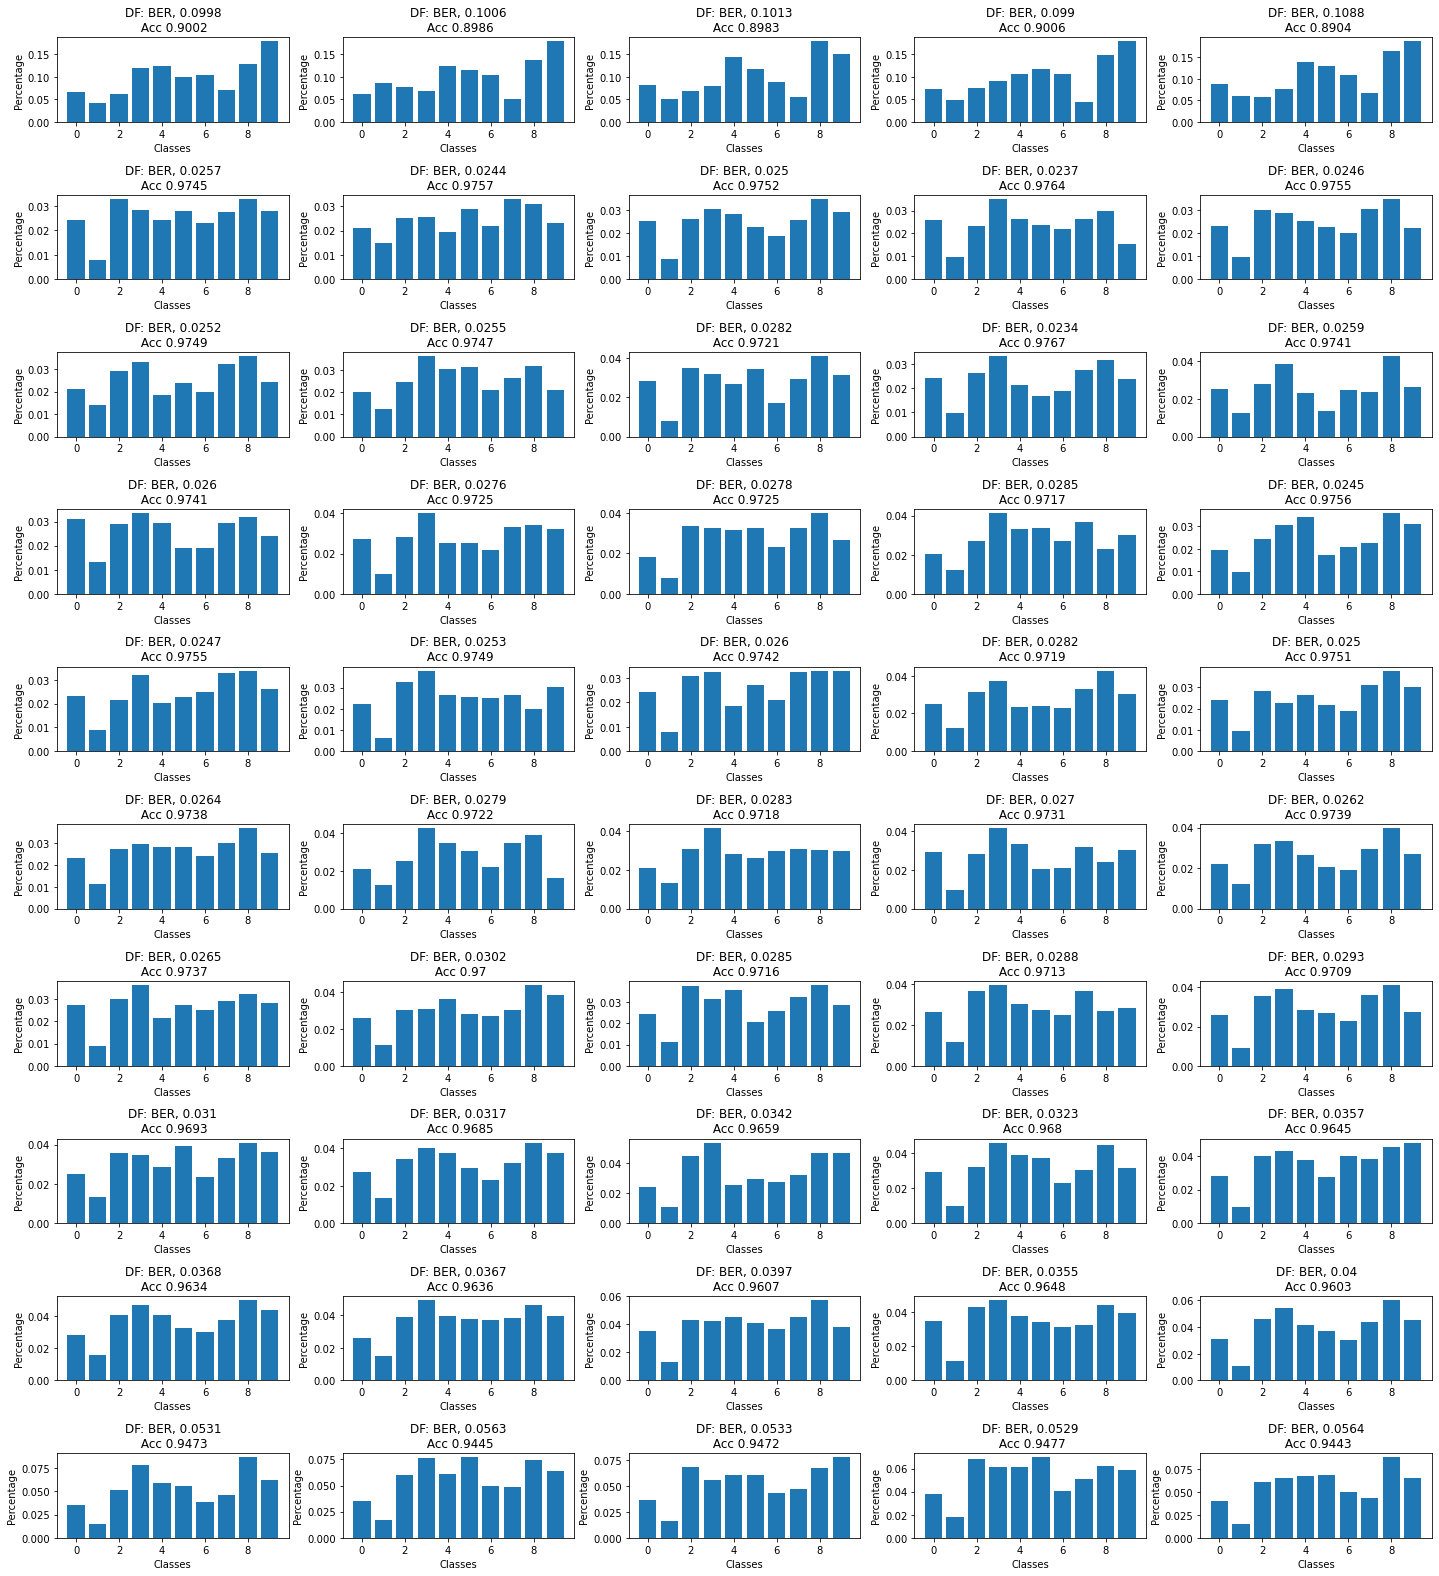

In [36]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="DF"
epoch=100

fig.set_figheight(22)
fig.set_figwidth(20)
df_base_ber_avg=[]; df_base_f1_avg=[]
for folder in range(5):
    ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

    df_base_ber_avg.append(np.mean(ber))
    df_base_f1_avg.append(dictionary['macro avg']['f1-score'])
    
print("baseline ber", np.array(df_base_ber_avg).mean())
print("baseline f1", np.array(df_base_f1_avg).mean())
i=1; j=0
df_ber_avg=[]; df_f1_avg=[]
for folder in range(5):
    bers=[]; f1s=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )
        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        bers.append(np.mean(ber))
        f1s.append(dictionary['macro avg']['f1-score'])
    df_ber_avg.append(bers)
    df_f1_avg.append(f1s)
    j += 1; i=1
print("ber RR", np.stack(df_ber_avg).mean(axis=0))
print("f1 RR", np.stack(df_f1_avg).mean(axis=0))
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

### Z-score

In [144]:
import scipy.stats as st
for i in range(df_ber.shape[1]):
    ber_list=np.array(df_ber[:,i])
    print(i+1, ber_list)
    count=0
    for value in df_ber[:, i]:
        z_score= (value - ber_list.mean()) / ber_list.std()
        print(f"{i+1}.{count}")
        print("cdf:", st.norm.cdf(z_score))
        if st.norm.cdf(z_score) > 0.5:
            print("from mean", st.norm.cdf(z_score)-0.5) # % from the mean
        else:
            print("from mean", 0.5-st.norm.cdf(z_score))
        print()
        count += 1

1 [0.1089 0.0922 0.0884 0.0937 0.0937]
1.0
cdf: 0.9727317314408349
from mean 0.4727317314408349

1.1
cdf: 0.32556335185370233
from mean 0.17443664814629767

1.2
cdf: 0.16046238155669407
from mean 0.33953761844330593

1.3
cdf: 0.40559280489105465
from mean 0.09440719510894535

1.4
cdf: 0.40559280489105465
from mean 0.09440719510894535

2 [0.11   0.0953 0.0919 0.0909 0.1064]
2.0
cdf: 0.922229901378616
from mean 0.42222990137861605

2.1
cdf: 0.32253716146066597
from mean 0.17746283853933403

2.2
cdf: 0.1852220782971824
from mean 0.3147779217028176

2.3
cdf: 0.15301436363928994
from mean 0.34698563636071006

2.4
cdf: 0.831375770360484
from mean 0.33137577036048405

3 [0.1129 0.0995 0.0915 0.0928 0.1086]
3.0
cdf: 0.9188113186053513
from mean 0.41881131860535126

3.1
cdf: 0.4269753264227913
from mean 0.07302467357720871

3.2
cdf: 0.12964299612192814
from mean 0.37035700387807186

3.3
cdf: 0.16485943600234892
from mean 0.3351405639976511

3.4
cdf: 0.8131919454115408
from mean 0.31319194541154

baseline ber 0.024278374314914274
baseline f1 0.9757322113845509


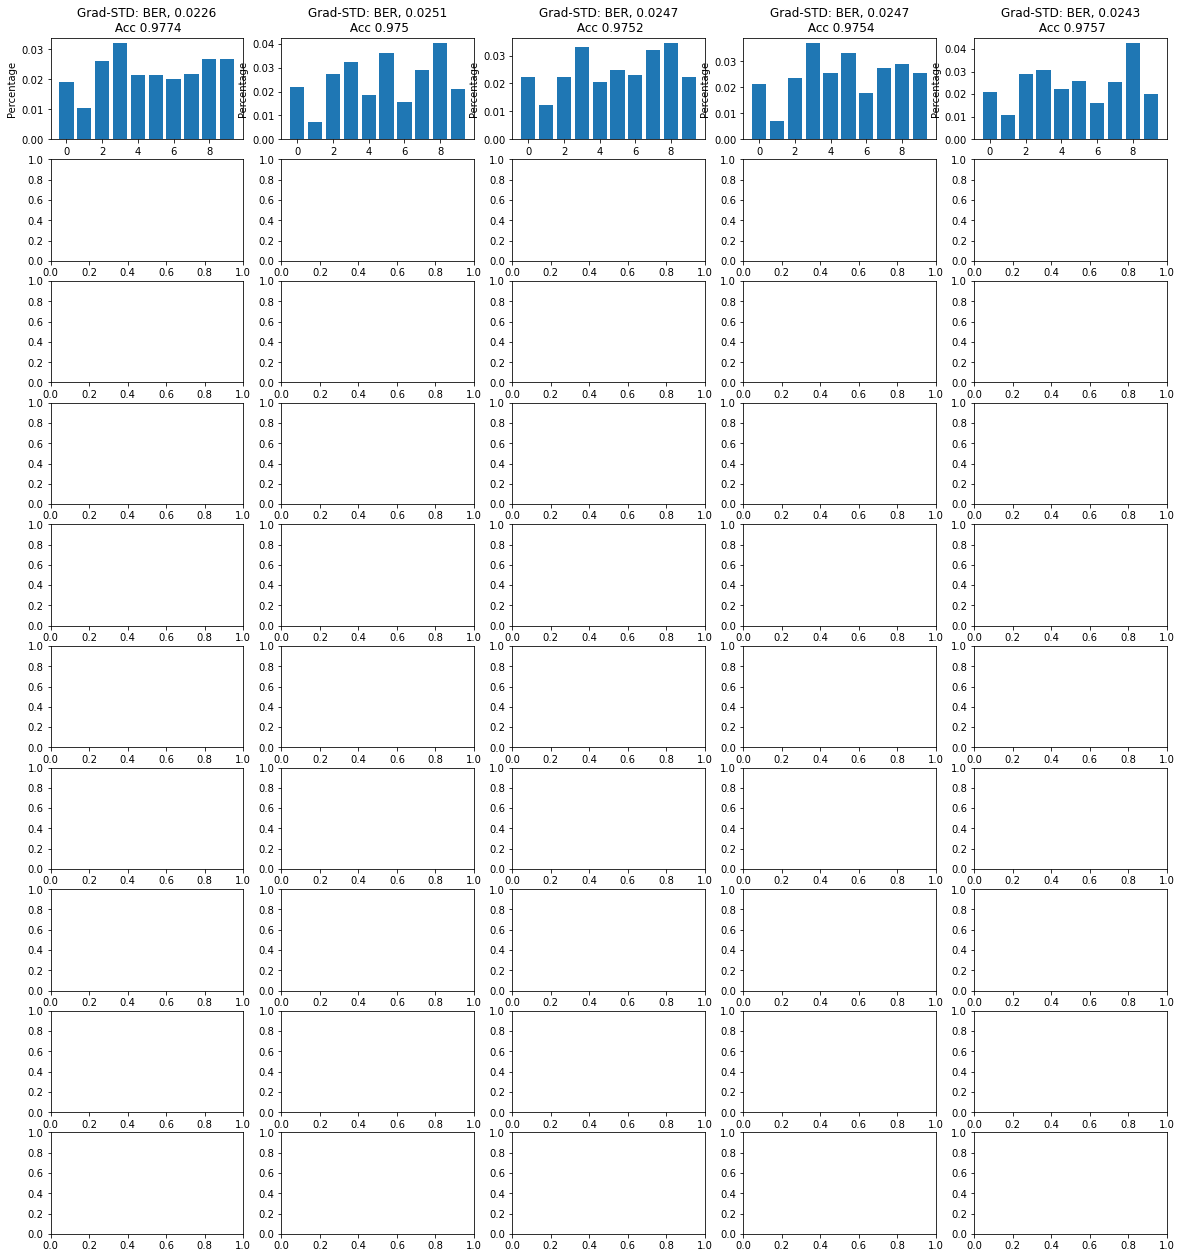

In [8]:
epoch=100
fig, axes= plt.subplots(10,5)
i=0; j=0
nfs_base_ber_avg=[];nfs_base_f1_avg=[]
fig.set_figheight(22)
fig.set_figwidth(20)
for folder in range(5):
    ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/Partial/MNIST-partial-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/Partial/MNIST-partial-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['macro avg']['f1-score'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

    nfs_base_ber_avg.append(ber); nfs_base_f1_avg.append(dictionary['macro avg']['f1-score'])

print("baseline ber", np.array(nfs_base_ber_avg).mean())
print("baseline f1", np.array(nfs_base_f1_avg).mean())




## NFS

baseline ber 0.023004666333796556
baseline f1 0.9769273917676008
ber RR [0.02484527 0.02502617 0.02641317 0.02812577 0.03240054 0.03520994
 0.045781   0.06443222 0.12003458]
f1 RR [0.9751     0.97494205 0.97355629 0.97181788 0.96756175 0.96468547
 0.9541557  0.93543881 0.87964745]


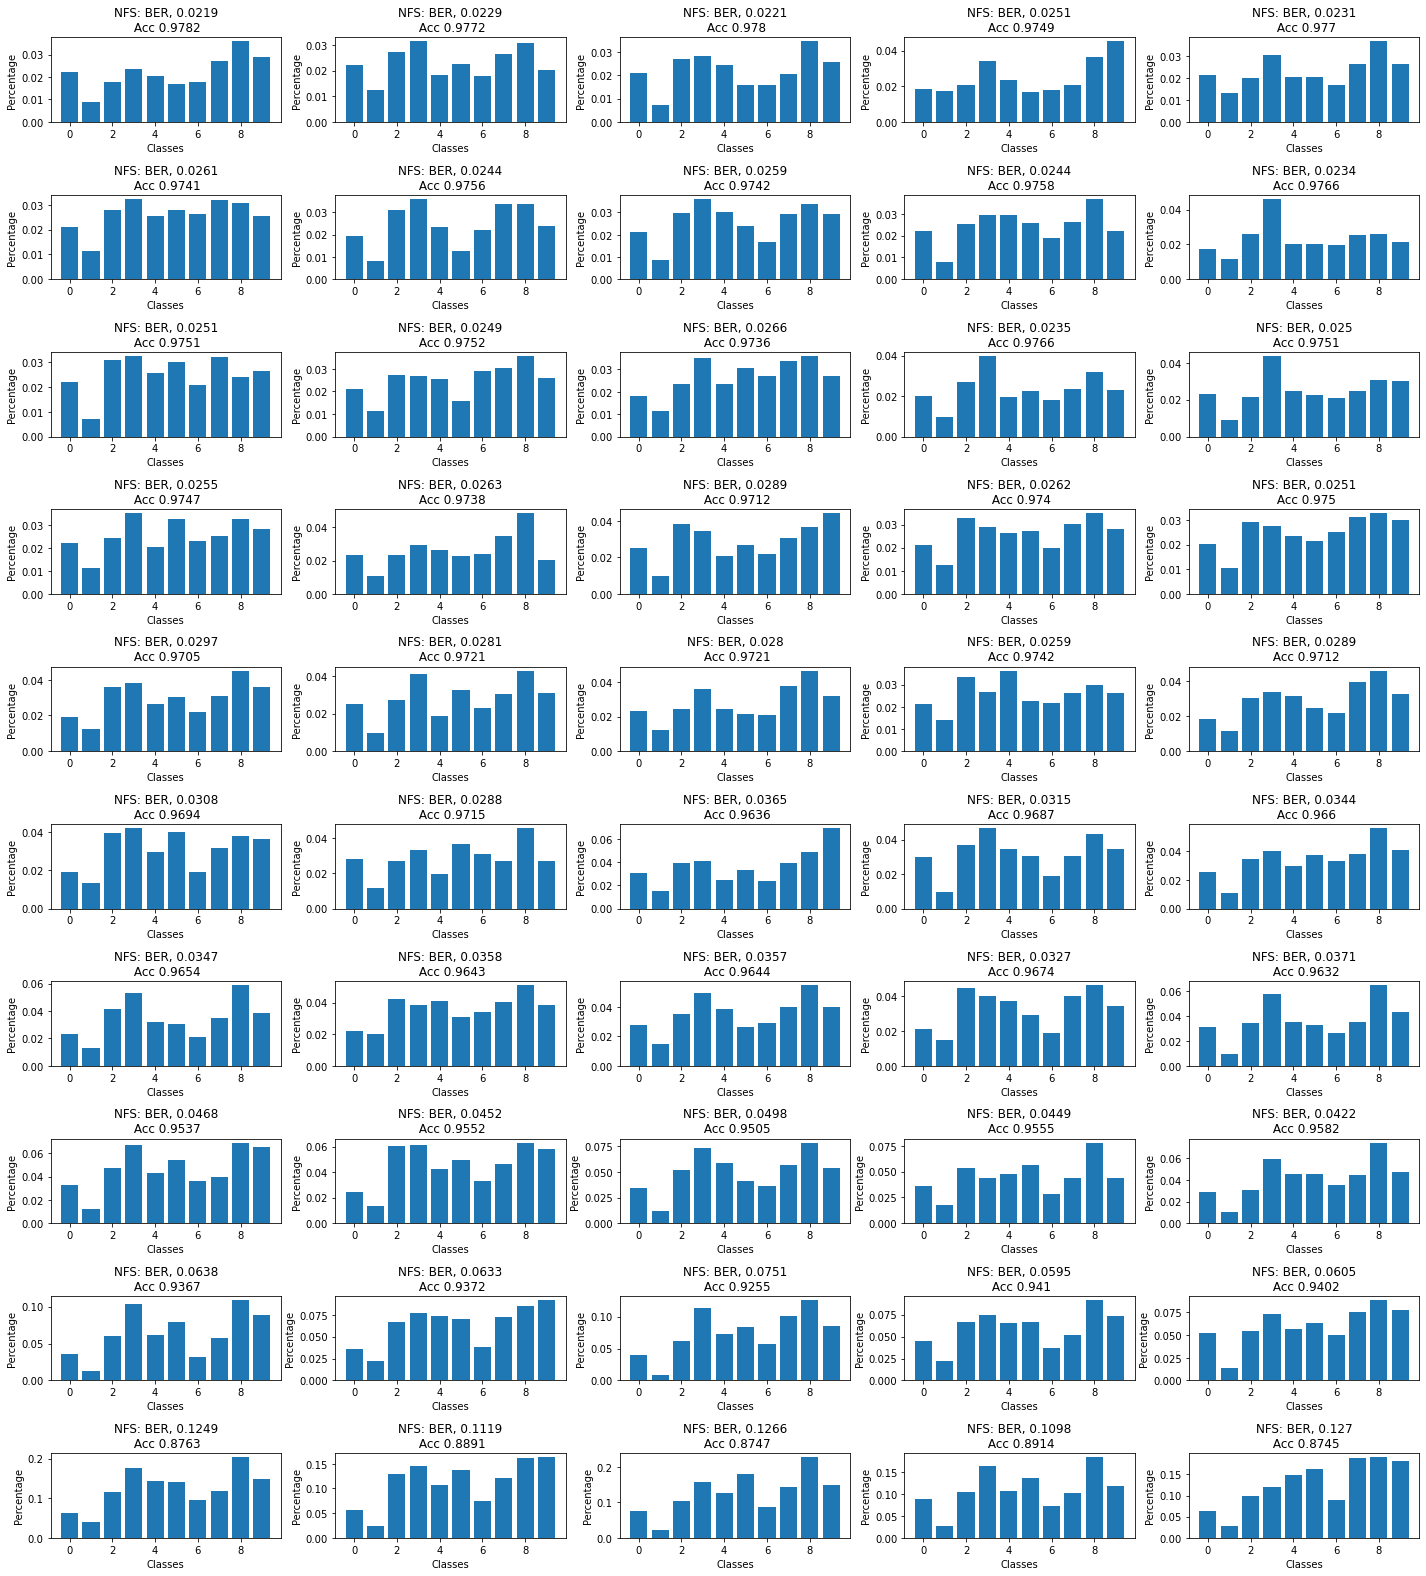

In [38]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"DF":"DF", "RS":"Baseline", "Fisher":"Baseline", "FScore":"Baseline", "NFS":"NFS",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="NFS"
epoch=100
nfs_ber=[]

fig.set_figheight(22)
fig.set_figwidth(20)
nfs_base_ber_avg=[];nfs_base_f1_avg=[]
for folder in range(5):
    ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1

    nfs_base_ber_avg.append(ber); nfs_base_f1_avg.append(dictionary['macro avg']['f1-score'])

print("baseline ber", np.array(nfs_base_ber_avg).mean())
print("baseline f1", np.array(nfs_base_f1_avg).mean())
    
i=1; j=0
nfs_ber_avg=[]; nfs_f1_avg=[]
for folder in range(5):
    bers=[]; f1s=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{model}/subset/MNIST-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        bers.append(np.mean(ber)); f1s.append(dictionary['macro avg']['f1-score'])
    nfs_ber_avg.append(bers); nfs_f1_avg.append(f1s)
    j += 1; i=1
print("ber RR", np.stack(nfs_ber_avg).mean(axis=0))
print("f1 RR", np.stack(nfs_f1_avg).mean(axis=0))
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

### Z-score

In [168]:
import scipy.stats as st
for i in range(nfs_ber.shape[1]):
    ber_list=np.array(nfs_ber[:,i])
    print(i+1, ber_list)
    count=0
    for value in nfs_ber[:, i]:
        z_score= (value - ber_list.mean()) / ber_list.std()
        print(f"{i+1}.{count}")
        print("cdf:", st.norm.cdf(z_score))
        if st.norm.cdf(z_score) > 0.5:
            print("from mean", st.norm.cdf(z_score)-0.5) # % from the mean
        else:
            print("from mean", 0.5-st.norm.cdf(z_score))
        print()
        count += 1

1 [0.0945 0.0927 0.0877 0.0944 0.1017]
1.0
cdf: 0.5266250849684351
from mean 0.026625084968435075

1.1
cdf: 0.36921088520514866
from mean 0.13078911479485134

1.2
cdf: 0.0739357287324135
from mean 0.4260642712675865

1.3
cdf: 0.5177573863510094
from mean 0.01775738635100943

1.4
cdf: 0.9525126428682709
from mean 0.45251264286827086

2 [0.0981 0.0894 0.0893 0.1034 0.1007]
2.0
cdf: 0.6291926820312715
from mean 0.12919268203127154

2.1
cdf: 0.12214934776690661
from mean 0.3778506522330934

2.2
cdf: 0.11870565249157805
from mean 0.38129434750842195

2.3
cdf: 0.8924881071892324
from mean 0.39248810718923244

2.4
cdf: 0.7811863738849611
from mean 0.28118637388496115

3 [0.1078 0.0933 0.088  0.1032 0.1039]
3.0
cdf: 0.8769665363980325
from mean 0.37696653639803246

3.1
cdf: 0.21043223449847503
from mean 0.28956776550152497

3.2
cdf: 0.06386445195316104
from mean 0.43613554804683896

3.3
cdf: 0.7042331835487736
from mean 0.20423318354877362

3.4
cdf: 0.736133729414525
from mean 0.23613372941452

## Grad

##### AUC

In [9]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
channels=np.arange(28*28)
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Grad/list/MNIST-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(np.array(list(dictionary.values())).reshape(28,28))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))
    

[8.92660759e-06 3.14612546e-03 1.61915881e-02 3.55104609e-02
 6.24104911e-02 9.12173021e-02 1.37439345e-01 2.03442797e-01
 3.46467151e-01]
[5.12848386e-06 2.57259582e-03 1.75982288e-02 3.63185067e-02
 5.72773538e-02 8.27941003e-02 1.30535091e-01 1.94821043e-01
 3.12383458e-01]
[1.09001309e-05 2.93435634e-03 1.78646472e-02 3.70610712e-02
 5.91266705e-02 8.11558831e-02 1.21961562e-01 1.93849824e-01
 3.25414382e-01]
[7.43722763e-06 2.95787061e-03 1.98183927e-02 4.02590153e-02
 6.97405387e-02 1.07441544e-01 1.52645856e-01 2.25545135e-01
 3.75010286e-01]
[1.37636365e-05 2.83462440e-03 1.42073404e-02 3.52105041e-02
 6.18832370e-02 8.76959243e-02 1.43831095e-01 2.07593014e-01
 3.22036957e-01]


In [12]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
channels=np.arange(28*28)

for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Grad/list/MNIST-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
    def dictionary_sort(x):
        return x[1]
    
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True)[:10])
    print()
    

[(321, 0.9999999932439607), (294, 0.9679254180973089), (322, 0.9672327324618664), (631, 0.8028198497515859), (381, 0.7637174736985912), (350, 0.7354895864115747), (407, 0.6966598842543306), (629, 0.6926395717653975), (293, 0.681118667050427), (515, 0.6500045072120173)]

[(321, 0.9999999742258936), (266, 0.7793657596528689), (630, 0.7433667830216422), (350, 0.7210606553505841), (294, 0.6260487249556874), (322, 0.6243492724844231), (320, 0.6150925895258794), (347, 0.61370061781885), (627, 0.5882506714867901), (604, 0.5859065797550649)]

[(294, 0.9999999779746034), (293, 0.7848240807830607), (322, 0.7475931254571577), (604, 0.7406823679790122), (349, 0.7095007355901757), (516, 0.6376784536559228), (628, 0.6332901427254356), (631, 0.5949886114101695), (576, 0.5944550744586579), (488, 0.5500335882402538)]

[(322, 1.0000000166519385), (630, 0.9987810024918531), (516, 0.9203443051296745), (293, 0.903540163922969), (514, 0.8587191543301742), (658, 0.8376844258231131), (631, 0.8148130764678285)

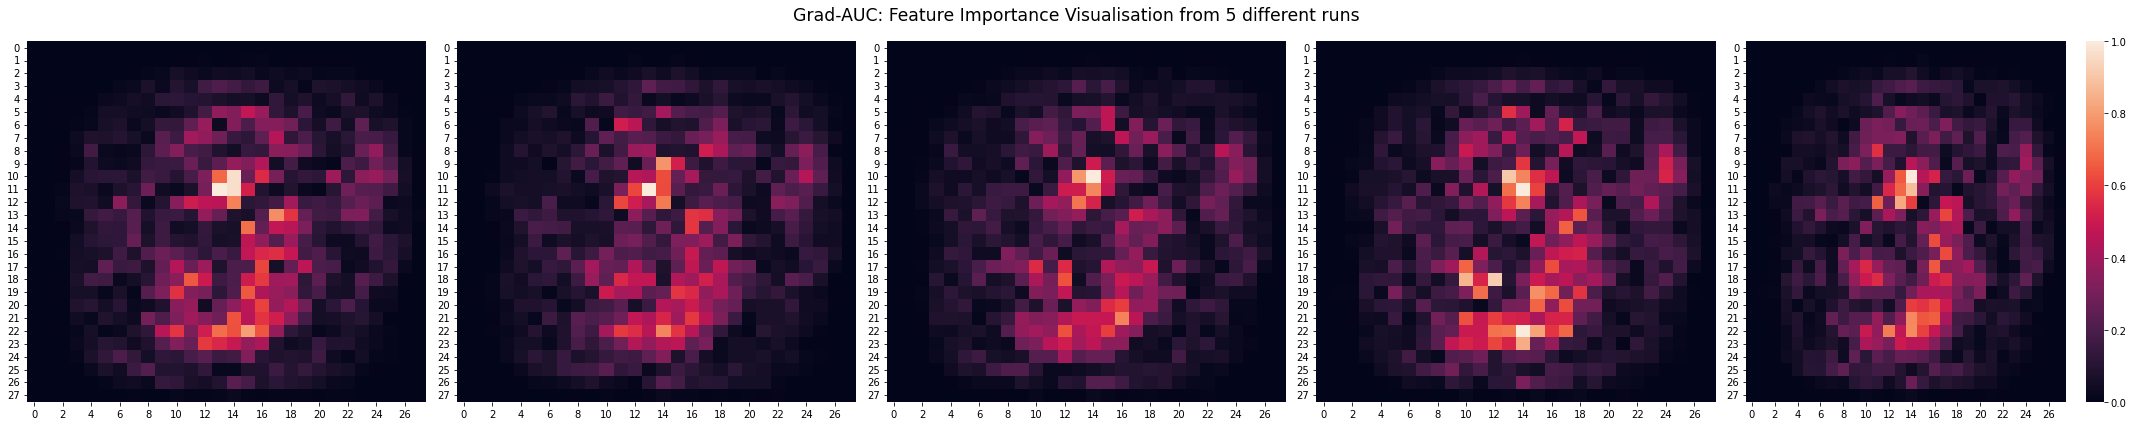

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
count=1
for dictionary in folder_dictionary[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(dictionary), cbar=False)

    count += 1

plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(folder_dictionary[-1]))
    
# plt.suptitle("Grad-AUC: Feature Importance Visualisation from 5 different runs", x=0.5, y=0.91, fontsize="xx-large")
plt.suptitle("Grad-AUC: Feature Importance Visualisation from 5 different runs", fontsize="xx-large")
plt.tight_layout()

In [13]:
from utilities.subset_func import return_epoch_stat
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler

channels=np.arange(28*28)
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Partial/Grad/list/MNIST-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for idx, name in zip(range(len(channels)), channels):
        dictionary[name]= np.trapz(abs(epoch[:, idx]))
    def dictionary_sort(x):
        return x[1]
    
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
    
    folder_dictionary.append(np.array(list(dictionary.values())).reshape(28,28))
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True)[:10])
    print()
    

[(294, 1.0000000565419498), (322, 0.7416359823037126), (629, 0.7264104296122866), (631, 0.6480236315262715), (349, 0.6279388779490063), (516, 0.6209983922003204), (657, 0.618777671982123), (601, 0.5941327760442121), (602, 0.5920396088641269), (521, 0.5860186689719455)]

[(294, 0.9999999951398024), (321, 0.937720116239376), (322, 0.9305532449282623), (349, 0.8521328694901911), (630, 0.8199581387778494), (657, 0.8152853853885063), (626, 0.7759594987387004), (659, 0.7536089327744264), (658, 0.7444642743458871), (629, 0.7300473283669078)]

[(604, 1.0000000384080465), (266, 0.9554146200153468), (350, 0.9532135969811861), (629, 0.9326784758108886), (382, 0.8940797724018523), (630, 0.8764199500433278), (294, 0.8741893619900054), (516, 0.870306999678121), (321, 0.857037864620338), (381, 0.8550860094452162)]

[(294, 0.9999999942141358), (349, 0.9216378252313007), (321, 0.8795992380652251), (492, 0.8500463135621317), (293, 0.7726118645746283), (350, 0.7704349599751481), (548, 0.7609196644128247)

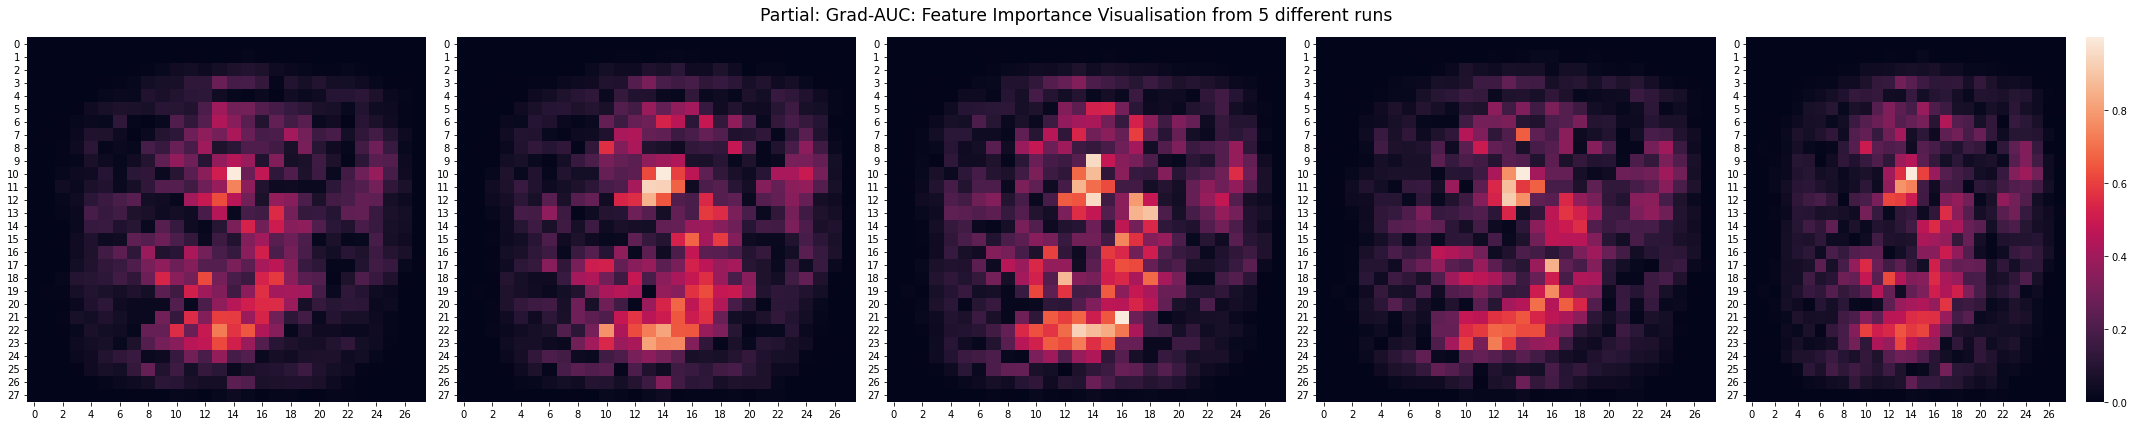

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
count=1
for dictionary in folder_dictionary[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(dictionary), cbar=False)
    count += 1
    
plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(folder_dictionary[-1]))
plt.suptitle("Partial: Grad-AUC: Feature Importance Visualisation from 5 different runs", fontsize="xx-large")
plt.tight_layout()

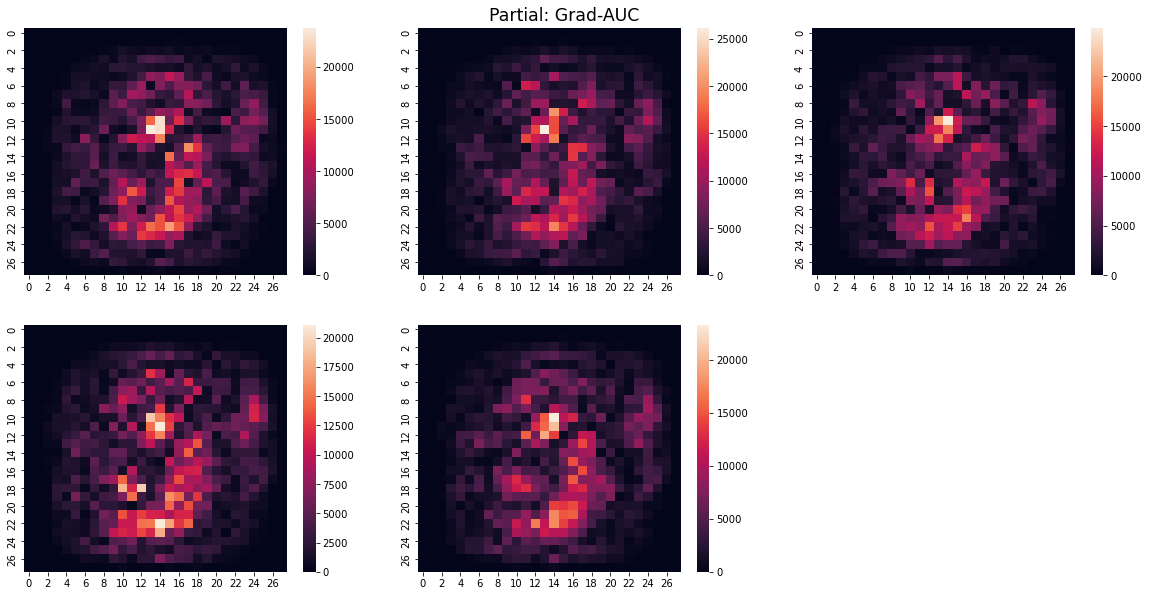

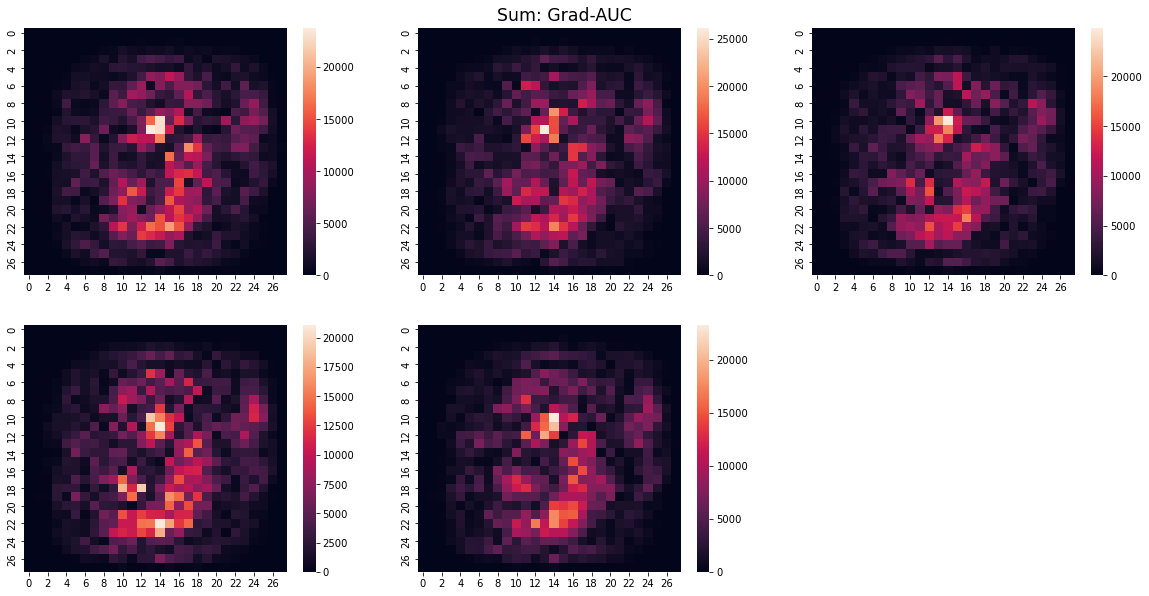

#### ROC

In [16]:
channels=np.arange(28*28)
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Grad/list/MNIST-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
    
    folder_dictionary.append(np.array(list(dictionary.values())).reshape(28,28))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[5.19180768e-06 3.46480214e-03 2.01330482e-02 8.18355939e-02
 1.61106770e-01 2.51431278e-01 3.52181567e-01 4.73086749e-01
 5.62693509e-01]
[4.45885351e-06 3.85524056e-03 2.63702401e-02 8.62383419e-02
 1.82465555e-01 2.71210251e-01 3.76249495e-01 5.18368735e-01
 6.07571757e-01]
[5.73323071e-06 3.95479794e-03 2.44705084e-02 8.42845336e-02
 1.69054833e-01 2.51742831e-01 3.68679891e-01 4.82464509e-01
 5.71690632e-01]
[6.47219709e-06 4.19483722e-03 2.69136980e-02 9.49087336e-02
 1.88919849e-01 2.85333721e-01 4.04848123e-01 5.45689170e-01
 6.61161792e-01]
[1.49527599e-05 4.74328125e-03 2.59769506e-02 9.22519238e-02
 1.95734293e-01 2.96645347e-01 4.36266967e-01 5.70835331e-01
 6.63062645e-01]


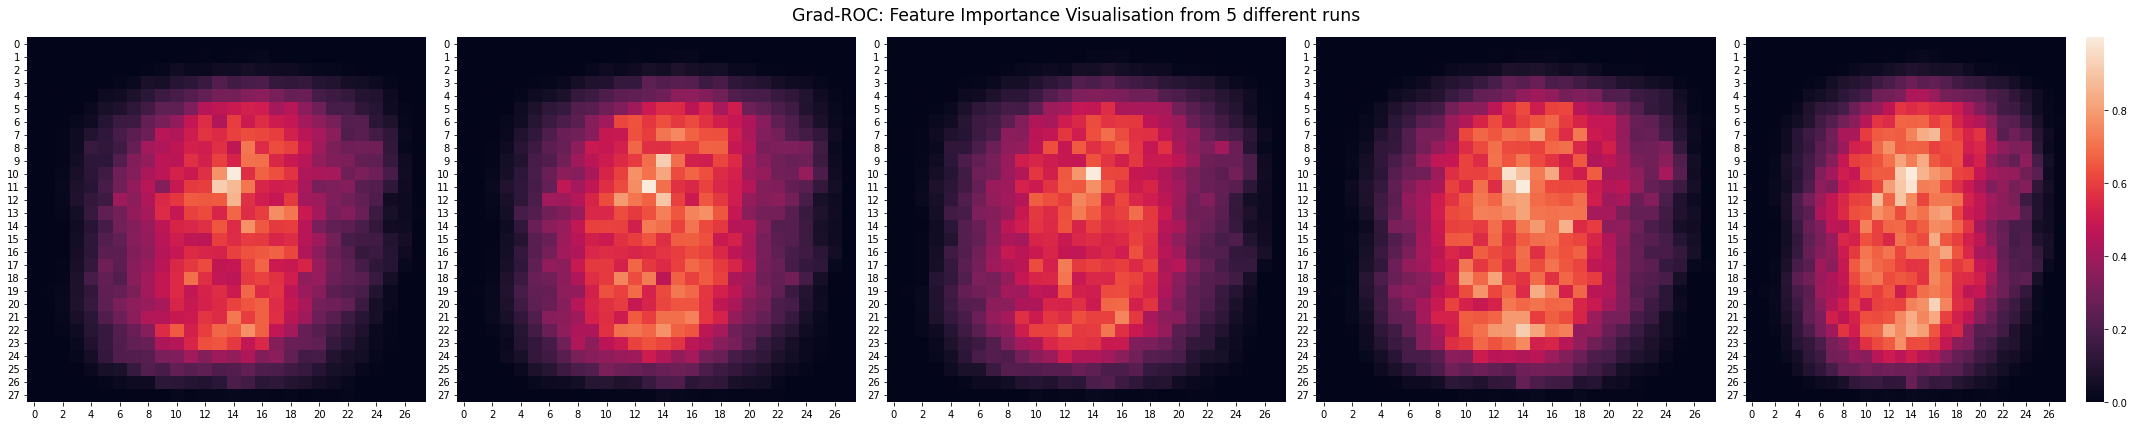

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
count=1
for dictionary in folder_dictionary[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(dictionary), cbar=False)
    count += 1
plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(folder_dictionary[-1]))
plt.suptitle("Grad-ROC: Feature Importance Visualisation from 5 different runs", fontsize="xx-large")
plt.tight_layout()

In [19]:
channels=np.arange(28*28)
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Partial/Grad/list/MNIST-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary={}
    for i in range(len(channels)):
        rolled= np.roll( epoch[:, i], 1 )
        rolled[0]=0.
        diff= epoch[:, i]-rolled
        dictionary[channels[i]]= np.trapz(abs(diff))
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
    
    folder_dictionary.append(np.array(list(dictionary.values())).reshape(28,28))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[4.23898270e-06 2.42428268e-03 2.14689011e-02 6.95469803e-02
 1.43490133e-01 2.17609150e-01 3.08835758e-01 4.22498528e-01
 5.17231665e-01]
[8.05088324e-06 3.23362785e-03 2.48518377e-02 8.60338708e-02
 1.65906613e-01 2.28373707e-01 3.25345461e-01 4.56943100e-01
 5.81008955e-01]
[4.25150909e-06 3.46667651e-03 2.54317646e-02 8.74032710e-02
 1.75513521e-01 2.52726571e-01 3.57997395e-01 4.90584513e-01
 6.16728862e-01]
[2.61705651e-06 3.28752380e-03 2.56586616e-02 8.27781011e-02
 1.54505119e-01 2.34828767e-01 3.32686219e-01 4.59803181e-01
 5.70271744e-01]
[3.03800618e-06 2.89846108e-03 2.00666975e-02 7.66643701e-02
 1.46383625e-01 2.12970914e-01 3.01755794e-01 4.04504866e-01
 5.14238778e-01]


Text(0.5, 0.98, 'Partial: Grad-ROC: Feature Importance Visualisation from 5 different runs')

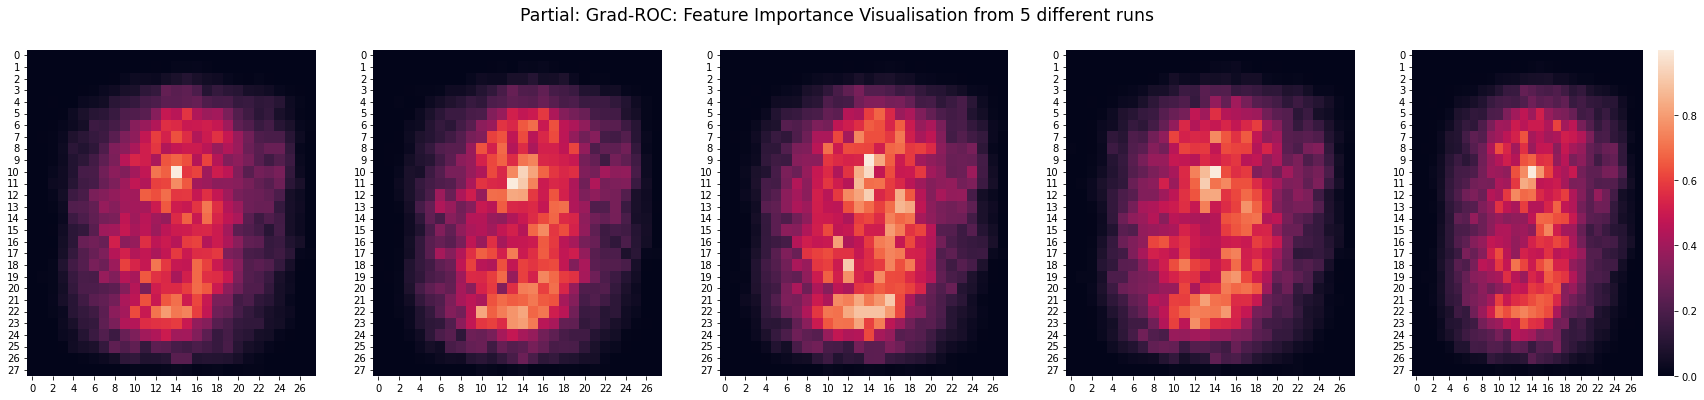

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
count=1
for dictionary in folder_dictionary[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(dictionary), cbar=False)
    count += 1
    
plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(folder_dictionary[-1]))
plt.suptitle("Partial: Grad-ROC: Feature Importance Visualisation from 5 different runs", fontsize="xx-large")

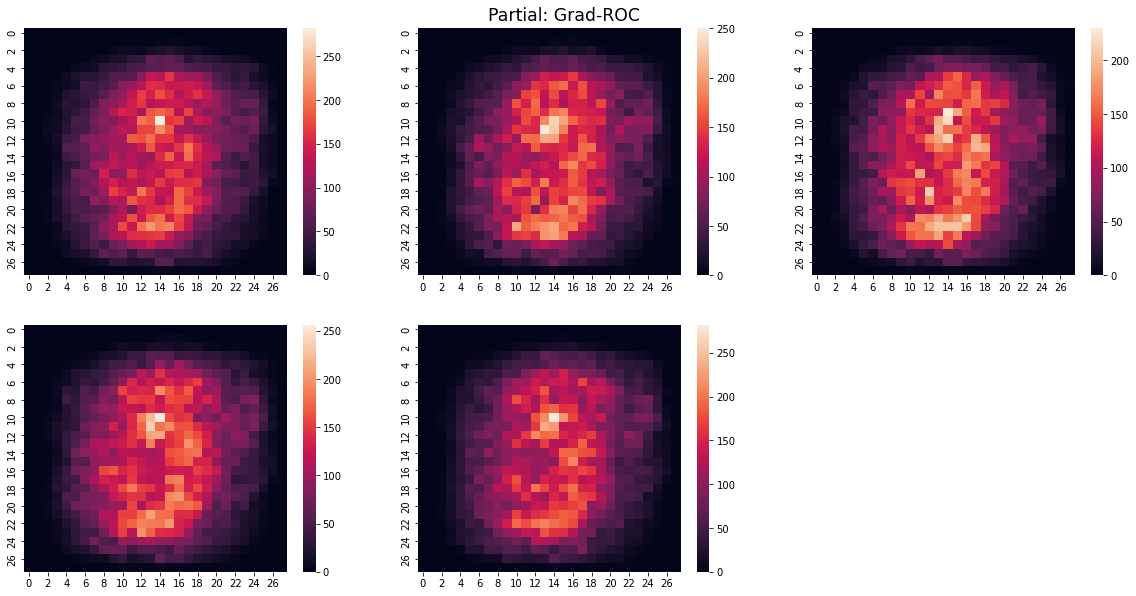

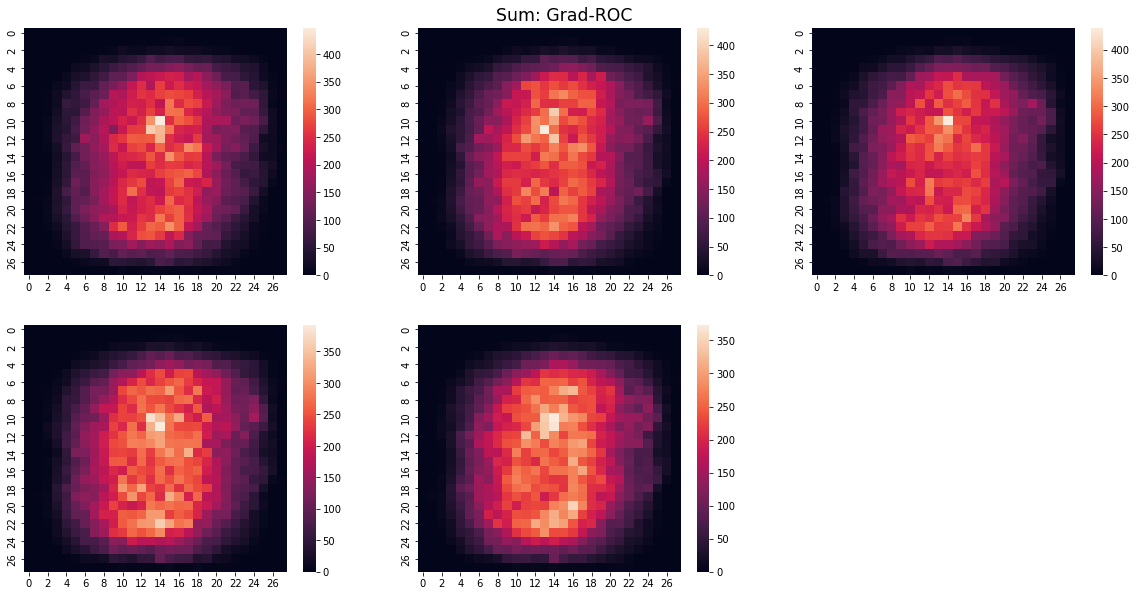

##### COV

In [20]:
from utilities.subset_func import return_epoch_stat, process_cov
import pickle

channels=np.arange(28*28)
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Grad/list/MNIST-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "sum")
    dictionary= process_cov(epoch, abs(np.cov(epoch.T )).mean(), channels)
    
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
    
    folder_dictionary.append(np.array(list(dictionary.copy().values())).reshape(28,28))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

Threshold:  101.20539663727851

[0.00000000e+00 0.00000000e+00 1.04814218e+02 9.99011153e+03
 2.59640773e+04 5.02728729e+04 7.75546204e+04 1.24611148e+05
 2.17127507e+05]
Threshold:  95.8766764197308

[0.00000000e+00 0.00000000e+00 1.04573165e+02 7.13585603e+03
 2.59173247e+04 4.24697497e+04 7.65599119e+04 1.23907764e+05
 1.97241357e+05]
Threshold:  93.06076022799579

[0.00000000e+00 0.00000000e+00 1.18453760e+02 7.11948266e+03
 2.24849605e+04 3.93480705e+04 6.48376537e+04 1.12110516e+05
 1.91243475e+05]
Threshold:  96.99888898309425

[     0.              0.              0.           8416.88753724
  26158.21196172  44619.97550491  76933.07403114 118242.41775571
 202707.67534286]
Threshold:  100.08555777673268

[     0.              0.              0.           8293.47940034
  24630.39615233  45082.55099228  75766.09607313 123100.5092106
 218297.2425013 ]


Text(0.5, 0.98, 'Grad-COV')

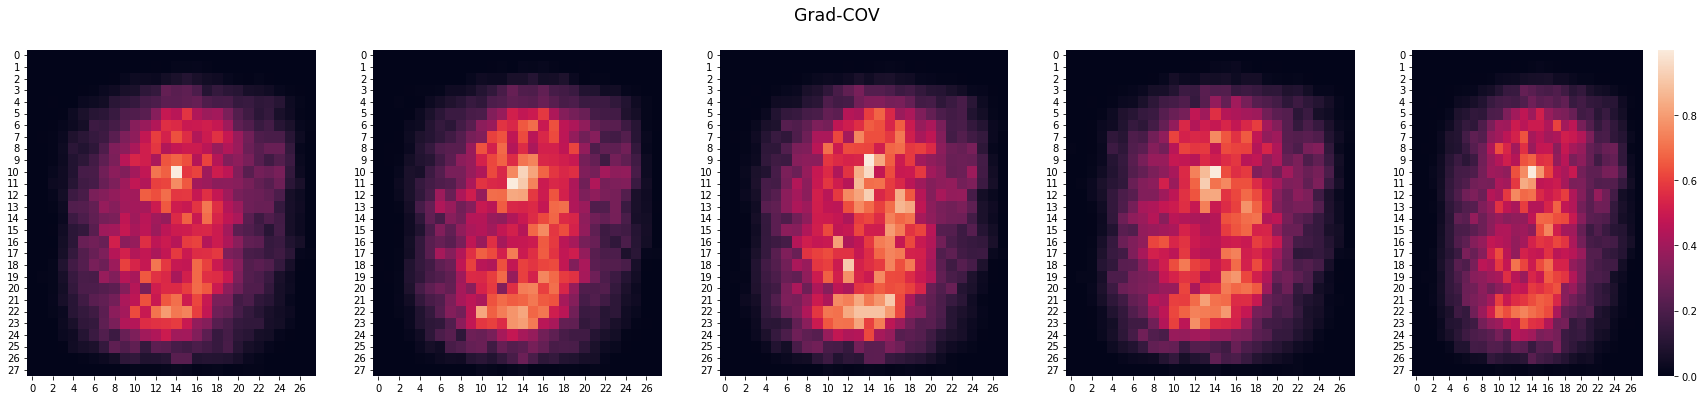

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
count=1
for dictionary in folder_dictionary[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(dictionary), cbar=False)
    count += 1
plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(folder_dictionary[-1]))
plt.suptitle("Grad-COV", fontsize="xx-large")

#### STD

In [2]:
from utilities.subset_func import return_epoch_stat, process_cov
import pickle
from sklearn.preprocessing import MinMaxScaler
import numpy as np

channels=np.arange(28*28)
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Grad/list/MNIST-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for i, j in zip(range(len(channels)), channels):
        dictionary[j]= np.trapz(epoch[:, i]) # AuC
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(np.array(list(dictionary.values())).reshape(28,28))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[4.91436061e-06 3.05397759e-03 2.05832736e-02 8.73307219e-02
 1.96463757e-01 3.20939962e-01 4.83668626e-01 6.72579126e-01
 7.92966526e-01]
[4.48348138e-06 3.08204076e-03 2.44456133e-02 8.07119096e-02
 1.84334842e-01 3.09124843e-01 4.61977398e-01 6.46367610e-01
 7.57275291e-01]
[3.08668854e-06 3.11840182e-03 2.17546516e-02 8.08307010e-02
 1.89388128e-01 3.08047275e-01 4.65769457e-01 6.40459002e-01
 7.49098007e-01]
[3.73812477e-06 2.97292470e-03 2.10061587e-02 7.86168510e-02
 1.78069337e-01 2.96939159e-01 4.53844876e-01 6.34643543e-01
 7.48663858e-01]
[5.98145880e-06 3.69357290e-03 2.30885288e-02 8.76628566e-02
 2.04639836e-01 3.34041812e-01 5.10767101e-01 6.98947724e-01
 8.21674174e-01]


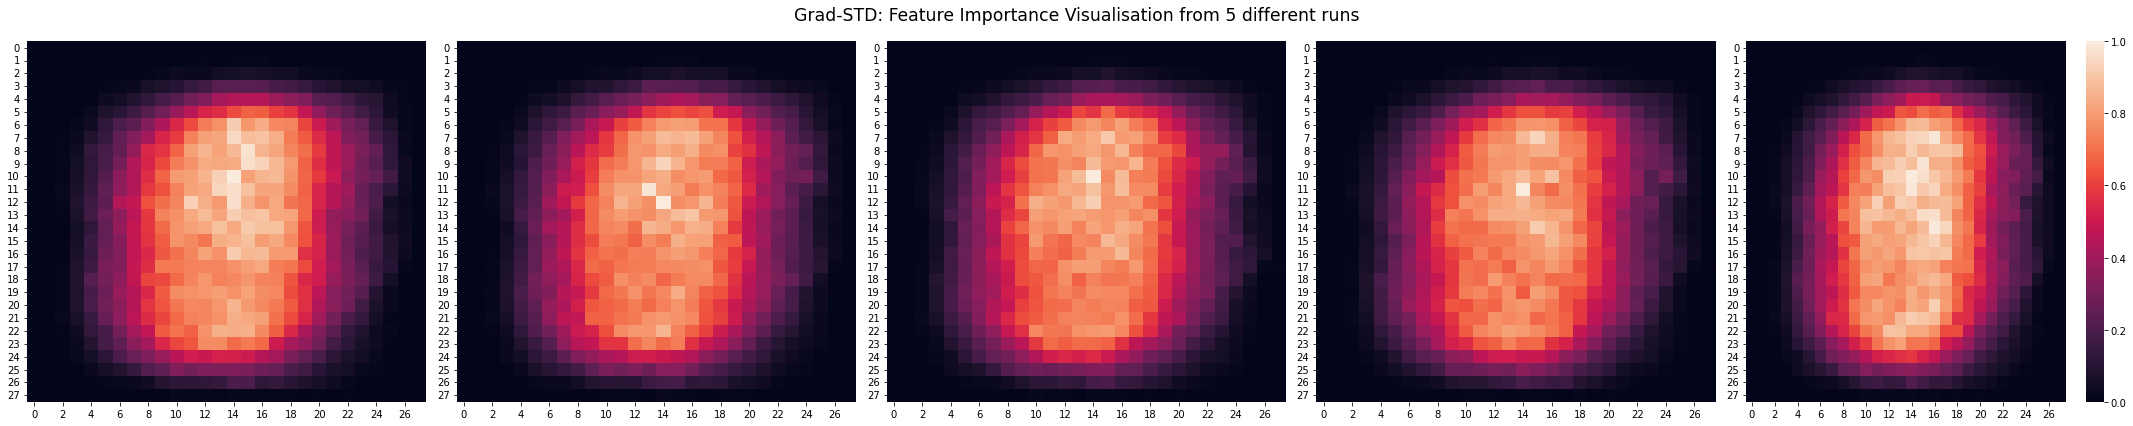

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
count=1
for dictionary in folder_dictionary[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(dictionary), cbar=False)
    count += 1
plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(folder_dictionary[-1]))
plt.suptitle("Grad-STD: Feature Importance Visualisation from 5 different runs", fontsize="xx-large")
plt.tight_layout()

In [4]:
from utilities.subset_func import return_epoch_stat, process_cov
import pickle

channels=np.arange(28*28)
folder_dictionary=[]
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Partial/Grad/list/MNIST-partial-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(50,-1,len(channels))
    
    scaler= MinMaxScaler()
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for i, j in zip(range(len(channels)), channels):
        dictionary[j]= np.trapz(epoch[:, i]) # AuC
        
    scaler.fit(np.array(list(dictionary.values())).reshape(-1,1))
        
    for key in dictionary.keys():
        dictionary[key]= scaler.transform([[dictionary[key]]]).reshape(-1)[0]
        
    folder_dictionary.append(np.array(list(dictionary.values())).reshape(28,28))
    print(np.percentile(list(dictionary.values()), [10,20,30,40,50,60,70,80,90]))

[2.32823255e-07 1.13214410e-03 1.50613746e-02 6.63059289e-02
 1.83634085e-01 3.01573989e-01 4.79427283e-01 6.61179740e-01
 7.87540991e-01]
[2.28470077e-07 1.24689870e-03 1.53759120e-02 7.13419198e-02
 1.83557278e-01 3.12686328e-01 4.79699565e-01 6.72798680e-01
 8.10428024e-01]
[1.48883984e-07 1.10805508e-03 1.50060230e-02 6.90922035e-02
 1.86498071e-01 3.26209557e-01 4.93820269e-01 6.88394146e-01
 8.18447374e-01]
[1.77418692e-07 1.19918933e-03 1.51381774e-02 7.11827440e-02
 1.78105716e-01 3.04569096e-01 4.65401010e-01 6.53147402e-01
 7.75501287e-01]
[1.92786658e-07 1.16994056e-03 1.39042224e-02 6.53468649e-02
 1.75479885e-01 3.10092530e-01 4.74720743e-01 6.65474082e-01
 7.91012142e-01]


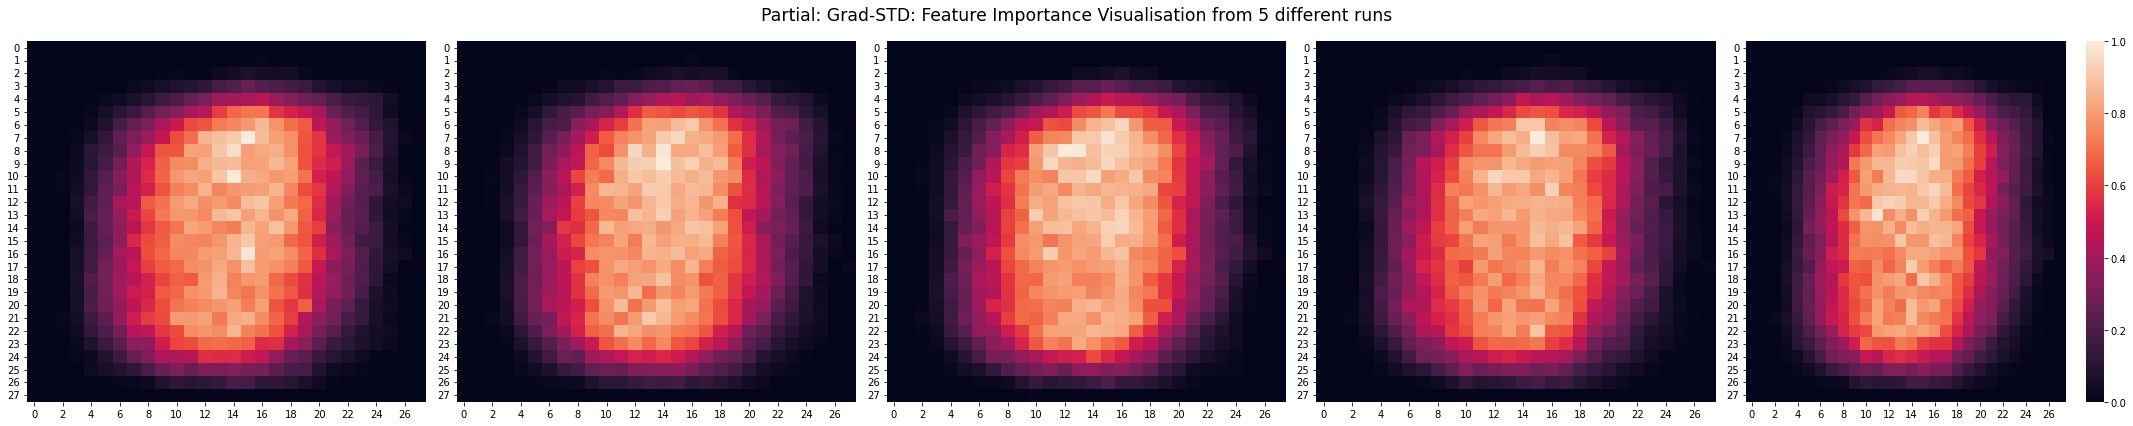

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,6))
count=1
for dictionary in folder_dictionary[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(dictionary), cbar=False)
    count += 1
plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(folder_dictionary[-1]))
plt.suptitle("Partial: Grad-STD: Feature Importance Visualisation from 5 different runs", fontsize="xx-large")
plt.tight_layout()

In [3]:
from utilities.preproc_func import return_epoch_stat, process_cov
import pickle

channels=np.arange(28*28)
for folder in range(5):
    grads= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/Grad/list/MNIST-Grad-list-100.pkl","rb"))
    grad_all= np.array(grads).reshape(100,-1,len(channels))
    
    epoch= return_epoch_stat(grad_all, "std")
    dictionary={}
    for i, j in zip(range(len(channels)), channels):
        dictionary[j]= np.trapz(epoch[:, i]) # AuC
        
    def dictionary_sort(x):
        return x[1]
    
    print(sorted(dictionary.items(), key=dictionary_sort, reverse=True)[:10])
    print()

[(239, 0.8513689), (322, 0.8486926), (211, 0.8427524), (434, 0.8350454), (212, 0.82792056), (265, 0.81107), (350, 0.81053674), (321, 0.80205977), (267, 0.80081546), (238, 0.79546833)]

[(294, 0.8869958), (211, 0.8774942), (293, 0.7969268), (322, 0.7865887), (239, 0.78543216), (350, 0.78406864), (265, 0.7757766), (436, 0.76931137), (379, 0.76577735), (376, 0.7655041)]

[(293, 0.8483615), (322, 0.8368866), (266, 0.83291173), (294, 0.81853), (211, 0.7954205), (238, 0.7926546), (408, 0.7884486), (268, 0.78104573), (380, 0.78056127), (462, 0.7773159)]

[(294, 0.8876649), (352, 0.8628047), (212, 0.8457063), (293, 0.82838535), (321, 0.82738215), (237, 0.8121483), (239, 0.81105876), (322, 0.8026967), (292, 0.7994745), (266, 0.7931127)]

[(294, 0.8530432), (211, 0.8159767), (321, 0.8113583), (210, 0.8108104), (238, 0.8062461), (209, 0.80322766), (350, 0.79413325), (407, 0.79183924), (377, 0.7886522), (212, 0.7848543)]



Text(0.5, 0.91, 'Partial: Grad-STD')

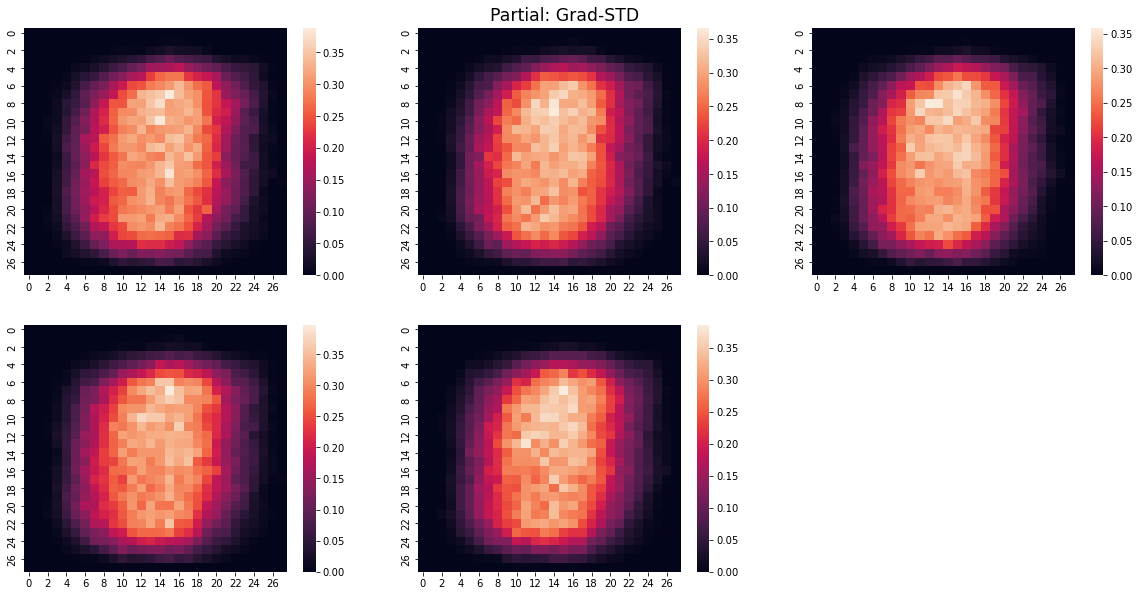

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
count=1
for dictionary in folder_dictionary:
    plt.subplot(2,3,count)
    sns.heatmap(pd.DataFrame(dictionary))

    count += 1
plt.suptitle("Partial: Grad-STD", x=0.5, y=0.91, fontsize="xx-large")

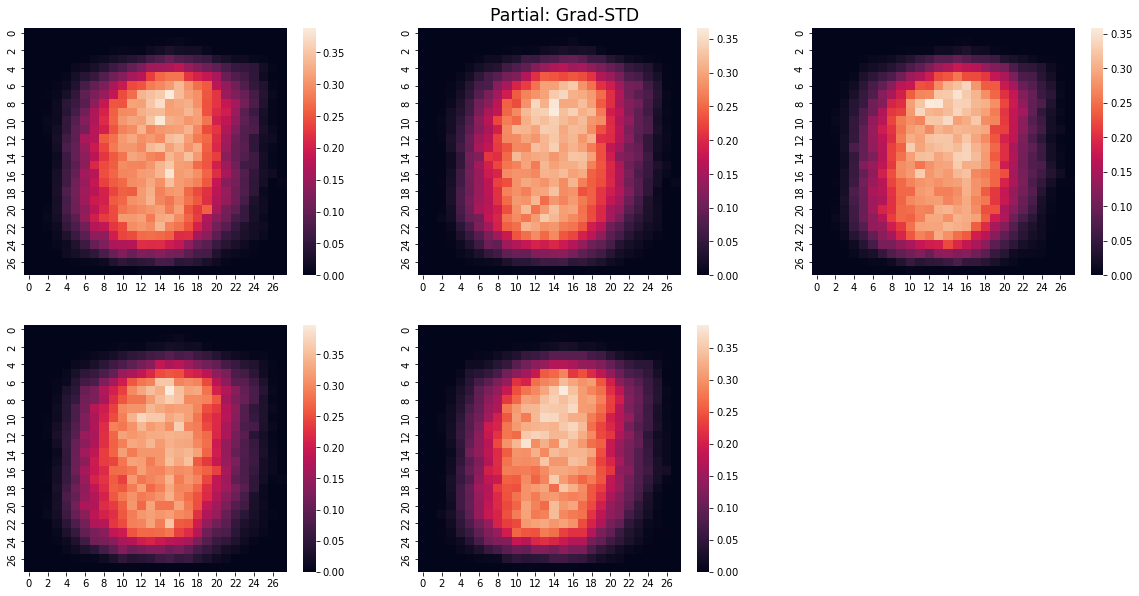

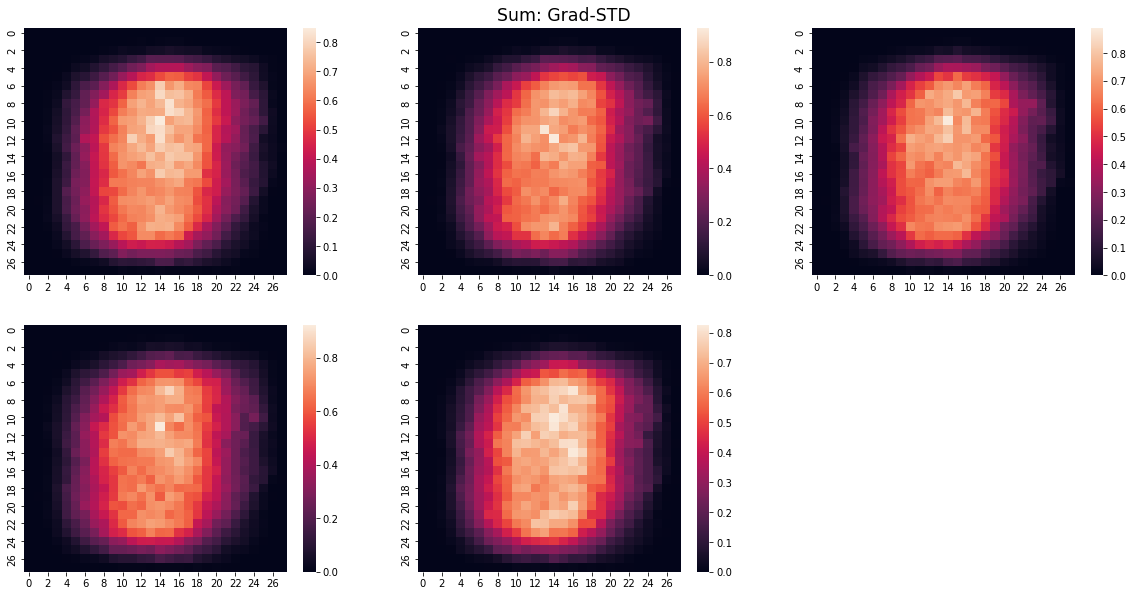

ber baseline 0.023334737916278863
f1 baseline 0.9766380012989053
ber RR [0.02403148 0.02433658 0.02422983 0.02417782 0.02479706 0.02591379
 0.02967516 0.04202764 0.07660184]
f1 RR [0.97592883 0.97562223 0.97576408 0.97583048 0.97517302 0.97406077
 0.97029589 0.95800428 0.92324084]


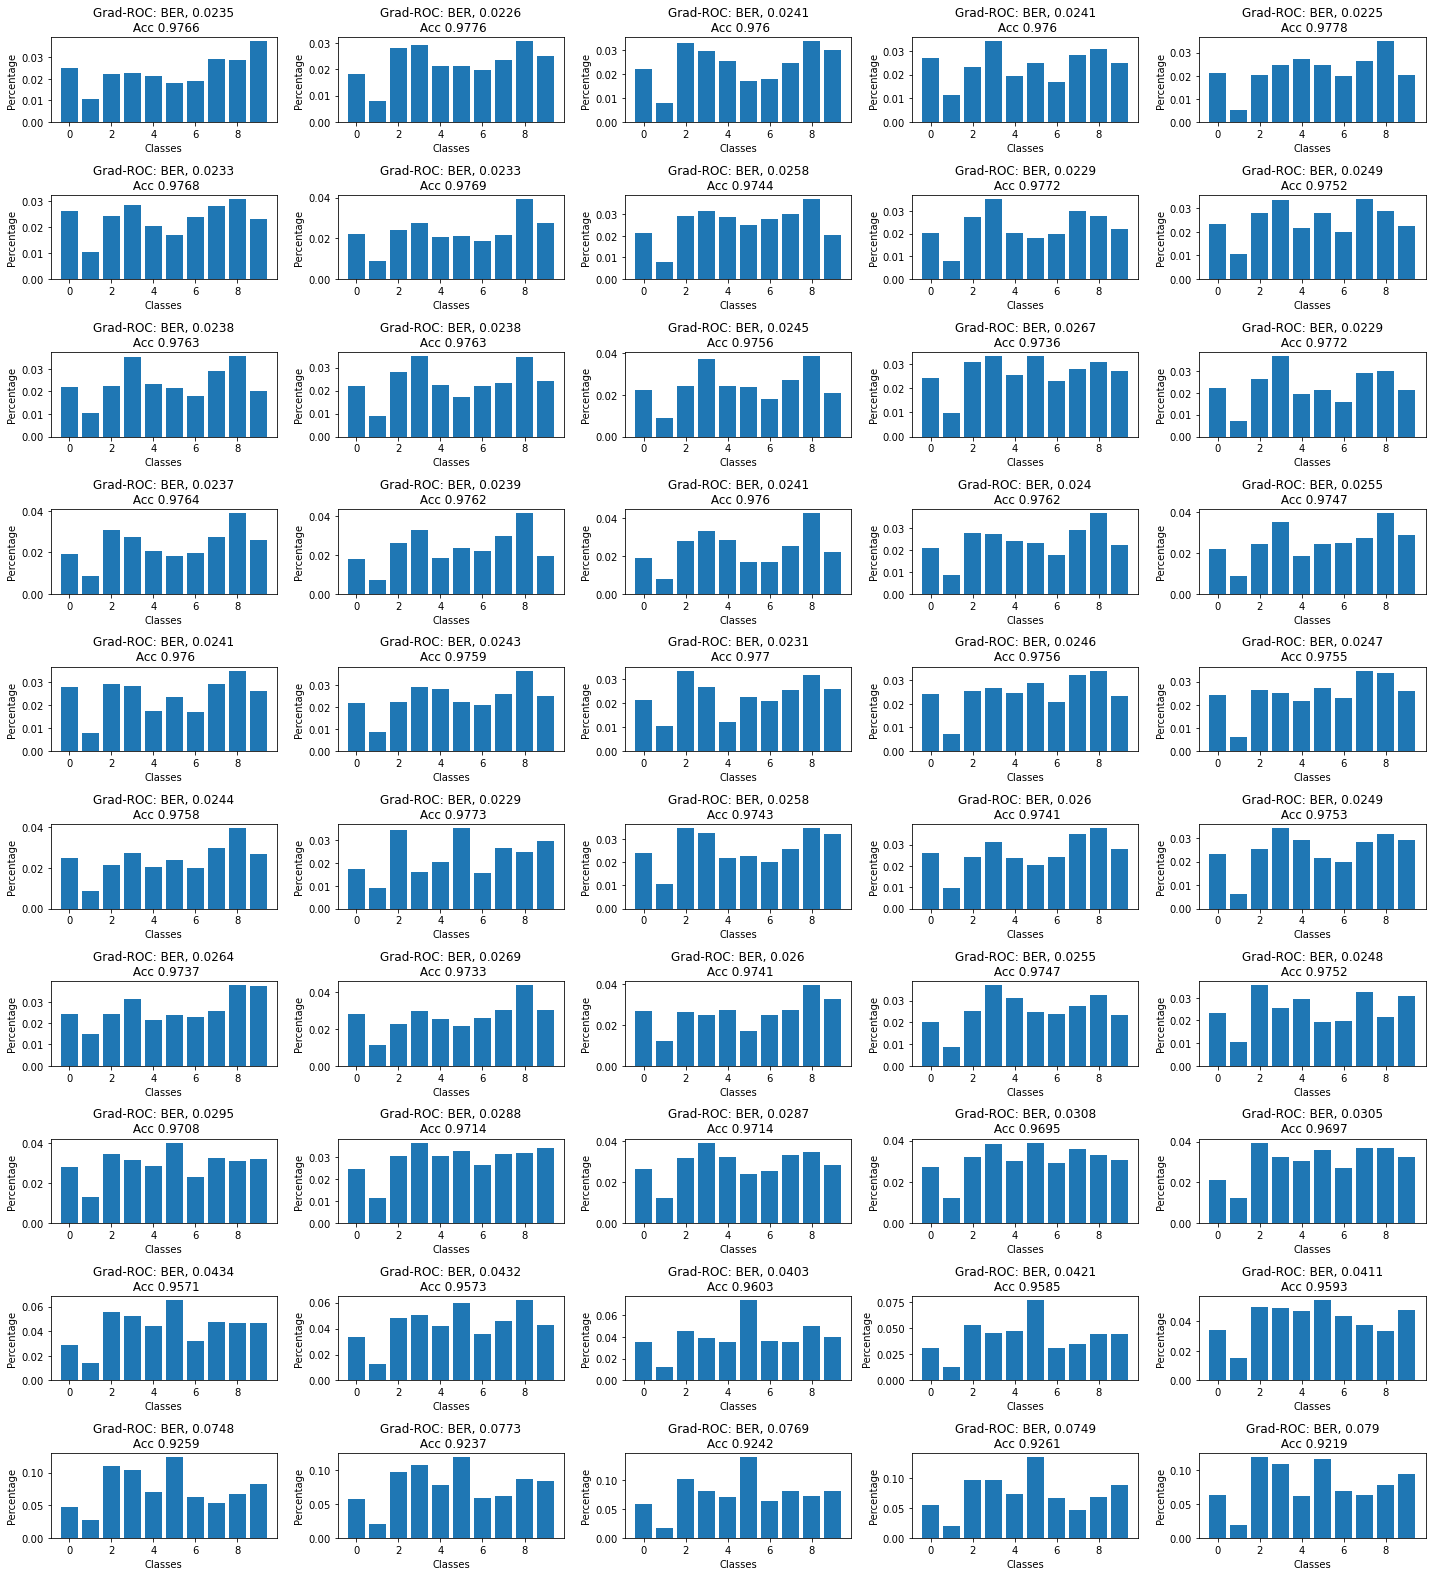

In [40]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

# #lung_small 200 - lung small subset for phases, grad need to be redone
# #USPS 200 is fine
# # Isolet 200, 500, 750

fig, axes= plt.subplots(10,5)
i=0; j=0
original_dict={"Grad-AUC":"Grad", "Grad-COV":"Grad", "Grad-ROC":"Grad", "Grad-STD":"Grad"} #folder: model
model="Grad-ROC"
epoch=100


fig.set_figheight(22)
fig.set_figwidth(20)
grad_base_ber_avg=[]; grad_base_f1_avg=[]
for folder in range(5):
    ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-ber-{epoch}.pkl", "rb") )
    dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{original_dict[model]}-v_dict-{epoch}.pkl", "rb") )
    axes[i][j].bar([i for i in range(len(ber))], ber)
    axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
    axes[i][j].set_xlabel("Classes")
    axes[i][j].set_ylabel("Percentage")
    j += 1
    
    grad_base_ber_avg.append(np.mean(ber))
    grad_base_f1_avg.append(dictionary['macro avg']['f1-score'])

print("ber baseline", np.array(grad_base_ber_avg).mean())
print("f1 baseline", np.array(grad_base_f1_avg).mean())
grad_ber_avg=[]; grad_f1_avg=[]
i=1; j=0
for folder in range(5):
    bers=[]; f1s=[]
    for percentile in range(10,100, 10):
        ber= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/subset/MNIST-subset-{model}-{percentile}-ber-{epoch}.pkl", "rb") )
        dictionary= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/subset/MNIST-subset-{model}-{percentile}-v_dict-{epoch}.pkl", "rb") )

        axes[i][j].bar([i for i in range(len(ber))], ber)
        axes[i][j].set_title(f"{model}: BER, {round(np.mean(ber),4)}\n Acc {round(dictionary['accuracy'],4)}")
        axes[i][j].set_xlabel("Classes")
        axes[i][j].set_ylabel("Percentage")
        i += 1
        bers.append(np.mean(ber))
        f1s.append(dictionary['macro avg']['f1-score'])
    grad_ber_avg.append(bers)
    grad_f1_avg.append(f1s)
    j += 1; i=1
print("ber RR",  np.stack(grad_ber_avg).mean(axis=0))
print("f1 RR", np.stack(grad_f1_avg).mean(axis=0))
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Weight Heatmap

In [29]:
import pickle
import numpy as np
from sklearn.preprocessing import MinMaxScaler
ws=[]
# original_dict={"Grad-sum":"Grad", "Grad-std":"Grad"} #folder: model
# model="Grad-sum"

original_dict={"DF":"DF", "RS":"RS", "NFS":"NFS",
               "Weight":"Weight", "ThresholdedWeight":"ThresholdedWeight"} #folder: model
model="DF"


for folder in range(5):
    scaler= MinMaxScaler()
    w= pickle.load( open(f"./experiments/MNIST/exp_log{folder}/{original_dict[model]}/MNIST-{model}-w-100.pkl", "rb") )
    w= scaler.fit_transform(np.array(w).reshape(-1,1)).reshape(-1)
    w= np.array(w).reshape(28,28)
    
    print(w.shape)
    ws.append(w)
        #         bers.append(ber)
#     print("percentile "+str(percentile),round(np.mean(bers), 4))


(28, 28)
(28, 28)
(28, 28)
(28, 28)
(28, 28)


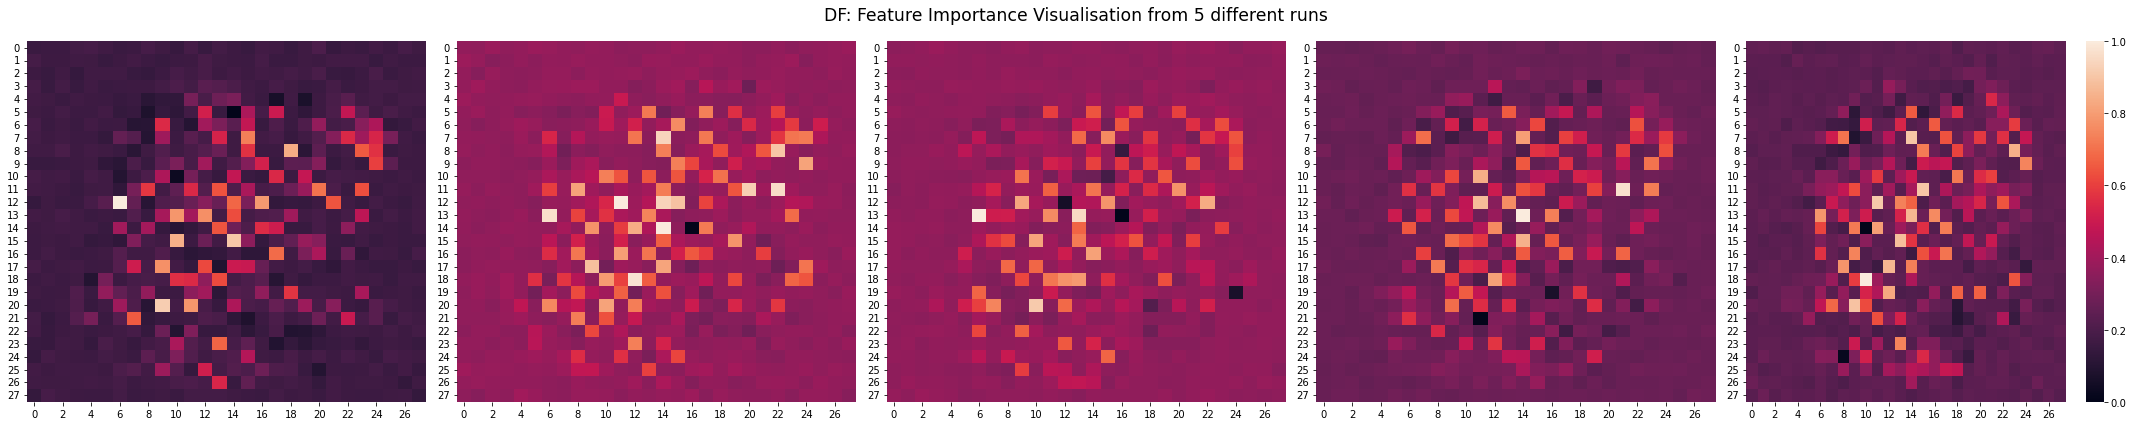

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
plt.figure(figsize=(30,6))
count=1
for w in ws[:-1]:
    plt.subplot(1,5,count)
    sns.heatmap(pd.DataFrame(w), cbar=False)
    count += 1
plt.subplot(1,5,count)
sns.heatmap(pd.DataFrame(ws[-1]))
plt.suptitle("DF: Feature Importance Visualisation from 5 different runs", fontsize="xx-large")
plt.tight_layout()

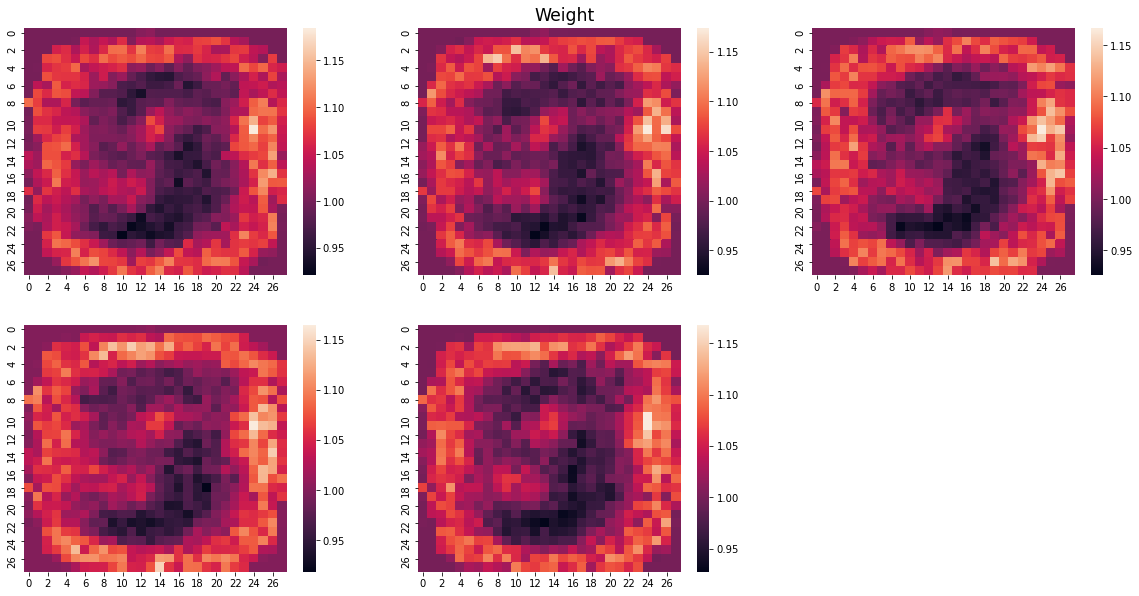

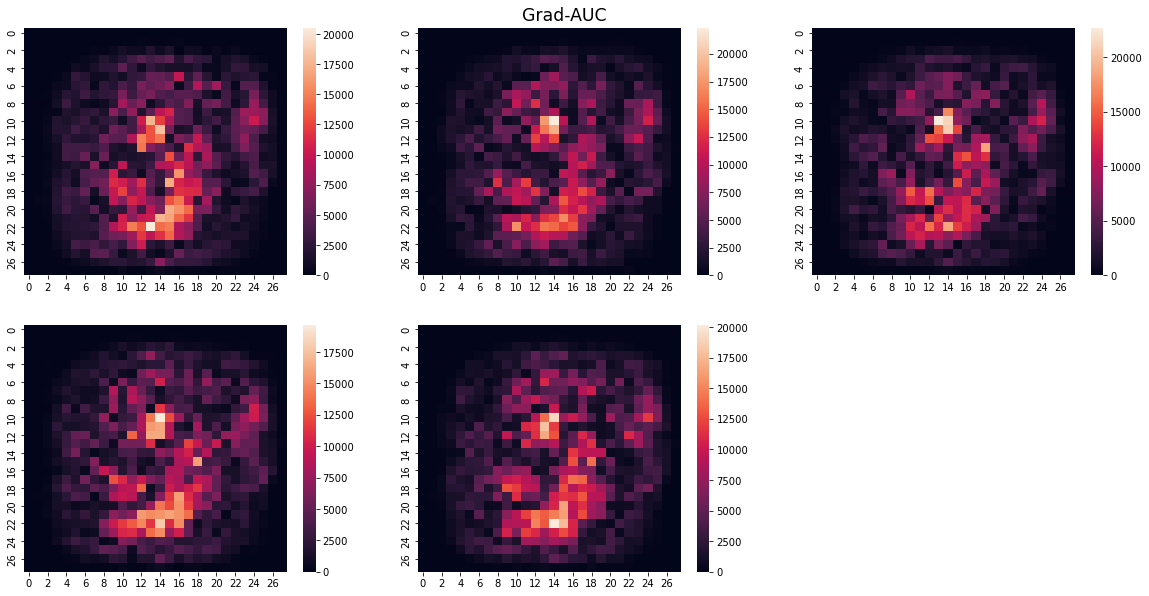

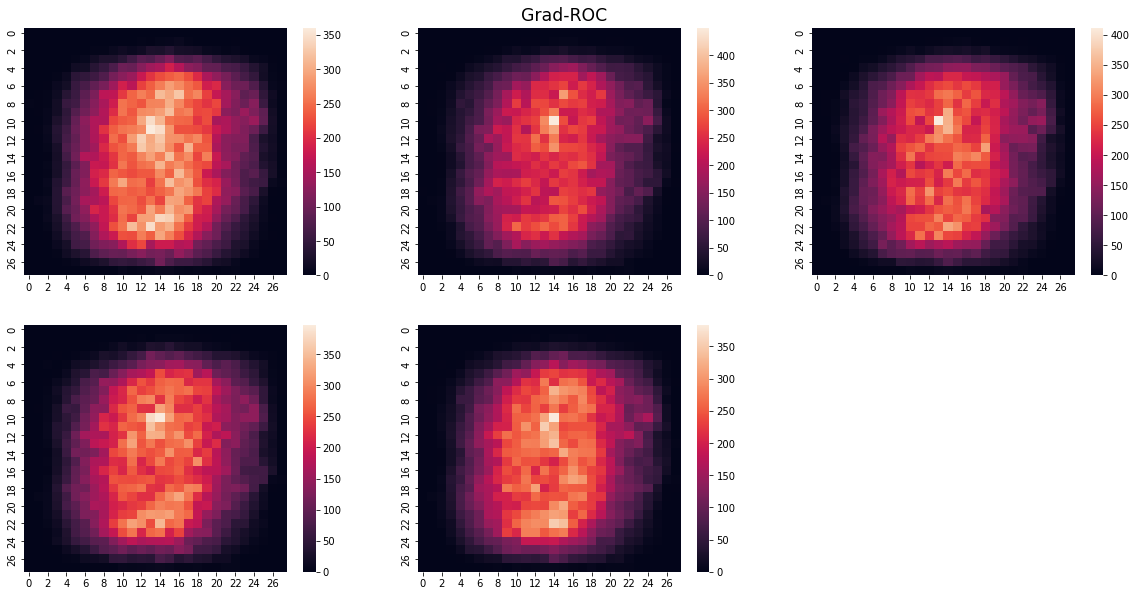

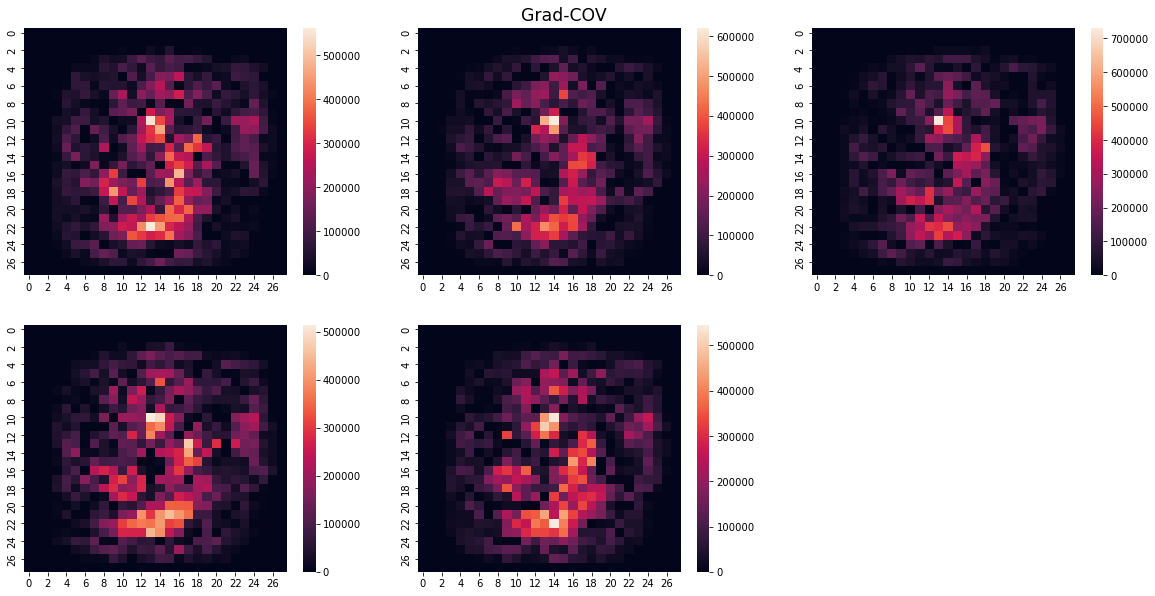

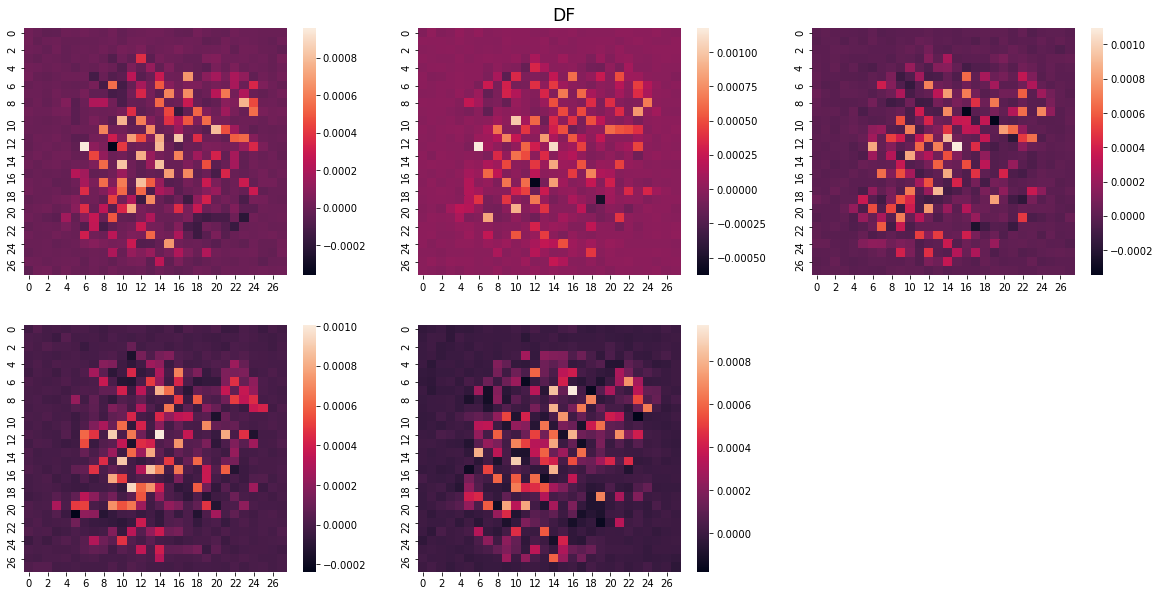

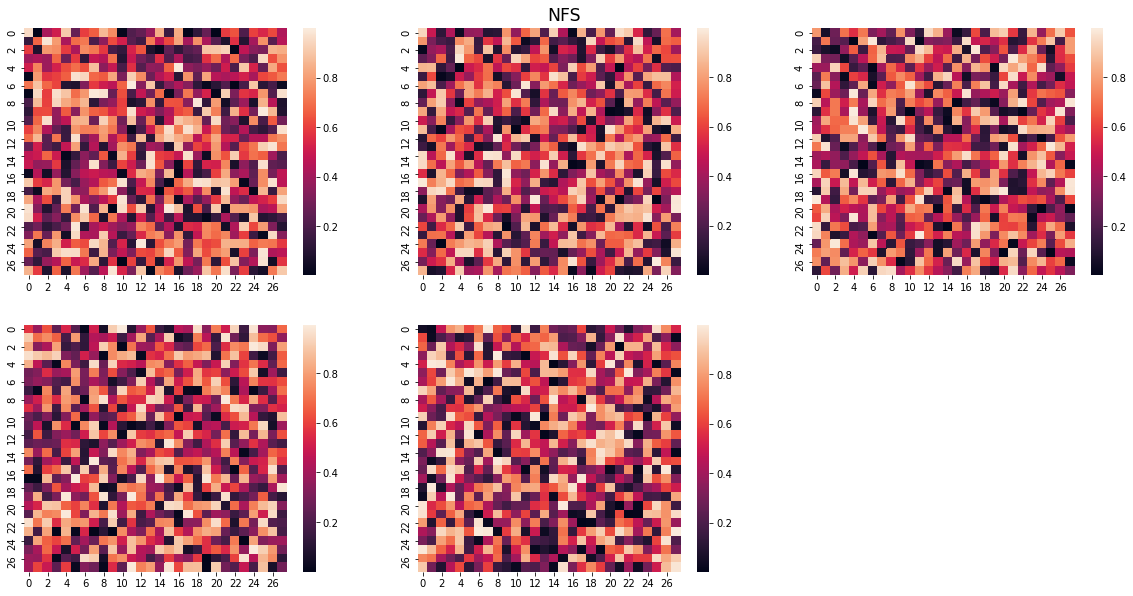

## Individual Folder

Text(0.5, 0, 'Discard Percentage')

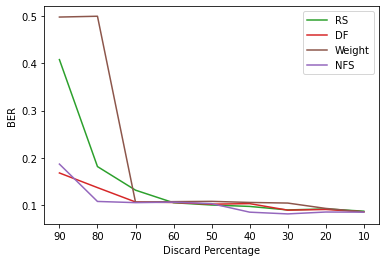

In [247]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


# fig, axes= plt.subplots(5,7)
i=0; j=0

folder="2"

# models={"Fisher":[], "FScore":[], "RS":[], "DF":[], "Simul":[], "ThresholdedSimul":[]}
models={ "RS":[], "DF":[], "Weight":[], "NFS":[]}
for_range= range(90,0,-10)
for model in models.keys():
    for percentage in for_range:
        
        if percentage==0:
            continue
        
        ber= pickle.load(open(f"./experiments/DryBean/exp_log{folder}/{model}/subset/DryBean-subset-{model}-{percentage}-ber.pkl", "rb"))

        models[model].append(round(np.mean(ber),4))
        
# models["Grad-sum"]=[]
# models["Grad-std"]=[]

# for model_dir, model in [("Grad", "Grad-std"), ("Grad", "Grad-sum")]:
#     for percentage in for_range:
        
#         if percentage==0:
#             continue
        
#         ber= pickle.load(open("./experiments/Benchmark/exp_log"+folder+"/"+model_dir+"/subset/benchmark-subset-"+model+"-"+dataset+"-"+str(percentage)+"-ber.pkl", "rb"))

#         models[model].append(round(np.mean(ber),4))
        

        #["subset-DF","subset-simul"]
for model, result in models.items():
    plt.plot(result, color=palette[colour[model]])
plt.legend(models.keys())
plt.xticks(range(len(for_range)),labels=[str(i) for i in for_range])
plt.ylabel("BER")
plt.xlabel("Discard Percentage")
# plt.ylim(top=1.0)

#         axes[i][j].set_title("BER, "+str(round(np.mean(ber),4)))
#         axes[i][j].set_xlabel("Classes")
#         axes[i][j].set_ylabel("Percentage")
#         axes[i][j].set_ylim([0, 0.7])
# #     print(plt.yticks())
# #     axes[i][j].set_yticks(["0."+str(z) for z in range(10)])
    
    
#         if j<6:
#             j+=1
#         elif j==6:
#             i+=1; j=0

# plt.suptitle("Dataset: "+dataset )
# # plt.tight_layout()
# fig.set_figheight(10)
# fig.set_figwidth(20)
# plt.tight_layout()

## Subset

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
complete_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [11]:
name_set= [("RS", "RS"),("Fisher","Fisher"), ("FScore", "FScore"),("DF","DF"),("NFS", "NFS"),("Weight", "Weight-Naive"), ("Grad", "Grad-AUC"), ("Grad","Grad-ROC"), ("Grad", "Grad-STD")]

In [22]:
existing_methods= [("Fisher","Fisher"), ("FScore", "FScore"),("RS", "RS"),("DF","DF")]

In [474]:
simul_comparison= [("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight"), ("RS", "RS"),("DF","DF")]

In [169]:
grad_comparison= [("Grad","Grad-sum"), ("Grad", "Grad-std"), ("RS", "RS"),("DF","DF")]

In [105]:
developing_methods= [("Grad","Grad-AUC"), ("Grad", "Grad-std"), ("Weight", "Weight"), ("ThresholdedWeight", "ThresholdedWeight")]

In [3]:
import seaborn as sns
# palette= sns.color_palette(as_cmap=True)
rocket_palette= sns.color_palette("rocket",as_cmap=True)
viridisr_palette= sns.color_palette("viridis_r",as_cmap=True)
viridis_palette= sns.color_palette("viridis",as_cmap=True)
colour={}
# for i, j in zip(range(len(complete_set)), [z[1] for z in complete_set]):
#     colour[j]= i

colour["RS"]= rocket_palette.colors[100]

for i, j in zip(['Fisher', 'FScore'], [rocket_palette.colors[160], rocket_palette.colors[210]]):
    colour[i]= j
    
for i, j in zip(["DF", "NFS", "Weight"], [viridisr_palette.colors[190], viridisr_palette.colors[215], viridisr_palette.colors[250]]):
    colour[i]= j
    
for i, j in zip(["Grad-AUC", "Grad-ROC", "Grad-STD"], [viridis_palette.colors[140], viridis_palette.colors[190], viridis_palette.colors[220]]):
    colour[i]=j
colour

{'RS': [0.61792306, 0.10325288, 0.35760108],
 'Fisher': [0.92676657, 0.29823282, 0.24285536],
 'FScore': [0.96403203, 0.65122535, 0.4932578],
 'DF': [0.227802, 0.326594, 0.546532],
 'NFS': [0.270595, 0.214069, 0.507052],
 'Weight': [0.273809, 0.031497, 0.358853],
 'Grad-AUC': [0.119423, 0.611141, 0.538982],
 'Grad-ROC': [0.35236, 0.783011, 0.392636],
 'Grad-STD': [0.636902, 0.856542, 0.21662]}

In [4]:
ber_dictionary={}
cr_dictionary={}
for_range= range(90,-10,-10)
epoch=100
# model_list= existing_methods+[("Simul", "Simul"), ("ThresholdedSimul", "ThresholdedSimul")] # simul
# model_list= developing_methods #s+[("RS", "RS"), ("DF", "DF")]
# model_list=[("Grad","Grad-sum"), ("Grad", "Grad-std"), ("DF", "DF")] # grad
# model_list= grad_comparison+[("Simul", "Simul"), ("Fisher","Fisher"), ("FScore", "FScore")] # outlier
# model_list= developing_methods+[("Fisher","Fisher"), ("FScore", "FScore")]
model_list= complete_set
for model_dir, model in model_list:
    ber={}
    dictionary={}
    for folder in ["0", "1", "2", "3","4"]:
        ber[folder]=[]
        dictionary[folder]=[]
        for percentage in [str(i) for i in for_range]:
            ber[folder].append( np.mean( pickle.load(open(f"./experiments/MNIST/exp_log{folder}/{model_dir}/subset/MNIST-subset-{model}-{percentage}-ber-{epoch}.pkl", "rb")) ) )
            tmp= pickle.load(open(f"./experiments/MNIST/exp_log{folder}/{model_dir}/subset/MNIST-subset-{model}-{percentage}-v_dict-{epoch}.pkl", "rb") )
            dictionary[folder].append( tmp  )
    ber_dictionary[model]= ber
    cr_dictionary[model]= dictionary
    
ber_dictionary_average_plt={}
ber_dictionary_average_sns={}
cr_dictionary_average_plt={}
cr_dictionary_average_sns={}
for i in ber_dictionary.keys():
    average=[]
    metrics_report=[]
    for j in ber_dictionary[i].keys():
        average.append(ber_dictionary[i][j])
        metrics_report.append( [ z["macro avg"]["f1-score"] for z in cr_dictionary[i][j] ] )
#     print(average)
    ber_dictionary_average_sns[i]= average#np.array(average).mean(axis=0)
    ber_dictionary_average_plt[i]= np.array(average).mean(axis=0)    
    cr_dictionary_average_sns[i]= metrics_report
    cr_dictionary_average_plt[i]= np.array(metrics_report).mean(axis=0)

In [5]:
from scipy.stats import ttest_ind


for percentage_idx in [0,1,2,3,4,5,6,7,8,9]:

    pval=[]
    tstats=[]
    for key in ["Grad-AUC", "Grad-ROC", "Grad-STD"]:
        v= np.array(ber_dictionary_average_sns[key])[:,percentage_idx]
        rs_v= np.array(ber_dictionary_average_sns['DF'])[:, percentage_idx]

        print(rs_v.mean(), v.mean())
        
        if 0.5< np.std(rs_v)/ np.std(v) < 2:
            print("similar variance")
            res= ttest_ind(v, rs_v)
            print(f"{key}: {for_range[percentage_idx]}, {res}")
            print()

        
        if np.std(rs_v) > 2*np.std(v) or np.std(v) > 2*np.std(rs_v):
            print("unqeual variance")
            res= ttest_ind(v, rs_v, equal_var=False)
            print(f"{key}: {for_range[percentage_idx]}, {res}")
            print()
        
        pval.append(res.pvalue)
        tstats.append(res.statistic)
        
#     print(for_range[percentage_idx], np.array(tstats).mean(), np.array(pval).mean())
    print()
        

0.05439789091622295 0.08385411140649804
unqeual variance
Grad-AUC: 90, Ttest_indResult(statistic=10.655242744491757, pvalue=0.00017731443679080397)

0.05439789091622295 0.07660183831159725
similar variance
Grad-ROC: 90, Ttest_indResult(statistic=19.8015156826887, pvalue=4.406026166427e-08)

0.05439789091622295 0.08511330227686453
unqeual variance
Grad-STD: 90, Ttest_indResult(statistic=12.205558985685064, pvalue=7.675505528311021e-05)


0.03772762505639095 0.041478642754895954
similar variance
Grad-AUC: 80, Ttest_indResult(statistic=3.716814997523034, pvalue=0.005898314480992406)

0.03772762505639095 0.04202763516847428
similar variance
Grad-ROC: 80, Ttest_indResult(statistic=4.021298015878093, pvalue=0.0038342196219326007)

0.03772762505639095 0.0423576581511397
unqeual variance
Grad-STD: 80, Ttest_indResult(statistic=4.783659906359129, pvalue=0.004007197237912553)


0.03298966477877903 0.03117878748635868
unqeual variance
Grad-AUC: 70, Ttest_indResult(statistic=-1.9203308329911175, p

In [14]:
for i in ber_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(ber_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
    print()
#     print(i, np.flip(ber_dictionary_average_plt[i]) )
#     print(i, np.flip(cr_dictionary_average_plt[i]) )
    print()

RS
0.0228 & 0.0239 & 0.0251 & 0.0259 & 0.028 & 0.0303 & 0.0362 & 0.0443 & 0.061 & 0.1084 & 

Fisher
0.0228 & 0.0225 & 0.0237 & 0.0242 & 0.0239 & 0.0246 & 0.0259 & 0.0318 & 0.0511 & 0.1153 & 

FScore
0.0228 & 0.0239 & 0.0241 & 0.0238 & 0.0239 & 0.0255 & 0.0292 & 0.0447 & 0.0899 & 0.3141 & 

DF
0.1019 & 0.0247 & 0.0256 & 0.0269 & 0.0258 & 0.0272 & 0.0287 & 0.033 & 0.0377 & 0.0544 & 

NFS
0.023 & 0.0248 & 0.025 & 0.0264 & 0.0281 & 0.0324 & 0.0352 & 0.0458 & 0.0644 & 0.12 & 

Weight
0.0238 & 0.027 & 0.0374 & 0.049 & 0.0572 & 0.0983 & 0.1538 & 0.2638 & 0.3829 & 0.4182 & 

Grad-AUC
0.0233 & 0.0236 & 0.0231 & 0.0238 & 0.0245 & 0.0258 & 0.0265 & 0.0312 & 0.0415 & 0.0839 & 

Grad-ROC
0.0233 & 0.024 & 0.0243 & 0.0242 & 0.0242 & 0.0248 & 0.0259 & 0.0297 & 0.042 & 0.0766 & 

Grad-STD
0.0233 & 0.0235 & 0.0244 & 0.0241 & 0.0248 & 0.0241 & 0.0255 & 0.03 & 0.0424 & 0.0851 & 



In [15]:
print("AUC") # larger it is, worse it is
for i in ber_dictionary_average_plt.keys():
#     print()
#     for j in np.flip(cr_dictionary_average_plt[i])[1:]:
#         print(round(j, 4), end="")
#         print(" & ", end="")
    print(i, round(np.trapz(np.flip(ber_dictionary_average_plt[i])[1:]),4) ) 
    print()

AUC
RS 0.317

Fisher 0.2741

FScore 0.4301

DF 0.2444

NFS 0.3298

Weight 1.265

Grad-AUC 0.2501

Grad-ROC 0.2455

Grad-STD 0.2496



In [17]:
print("AUC")

for i in ["DF","Grad-AUC", "Grad-ROC", "Grad-STD", "FScore"]:

    print(np.trapz(np.flip(ber_dictionary_average_sns[i])[:,1:]))

# res = ttest_ind(v1, v2)

[0.24711881 0.24193637 0.2517756  0.24538446 0.23590945]
[0.24442603 0.2428987  0.25789866 0.25269053 0.25267148]
[0.24648688 0.24851513 0.24389602 0.24414833 0.2443263 ]
[0.25151614 0.25105505 0.2458788  0.24907986 0.25071633]
[0.4266684  0.43130192 0.42804018 0.43103882 0.4335882 ]


In [6]:
from scipy.stats import ttest_ind

df_v= [0.24711881, 0.24193637, 0.2517756,  0.24538446, 0.23590945]
auc_v= [0.24442603, 0.2428987,  0.25789866, 0.25269053, 0.25267148]
roc_v= [0.24648688, 0.24851513, 0.24389602, 0.24414833, 0.2443263 ]
std_v= [0.25151614, 0.25105505, 0.2458788,  0.24907986, 0.25071633]
fscore_v= [0.4266684,  0.43130192, 0.42804018, 0.43103882, 0.4335882 ]

stats= []
pval=[]

if 0.5< np.std(df_v)/ np.std(auc_v) < 2:
    print("similar variance")
    res= ttest_ind(df_v, auc_v)
    print(f"{key}: {for_range[percentage_idx]}, {res}")
    print()

        
if np.std(df_v) > 2*np.std(auc_v) or np.std(auc_v) > 2*np.std(df_v):
    print("unqeual variance")
    res= ttest_ind(df_v, auc_v, equal_var=False)
    print(f"{key}: {for_range[percentage_idx]}, {res}")
    print()

# res = ttest_ind(df_v, auc_v)
print(res)
stats.append(res.statistic)
pval.append(res.pvalue)

if 0.5< np.std(df_v)/ np.std(roc_v) < 2:
    print("similar variance")
    res= ttest_ind(df_v, roc_v)
    print(f"{key}: {for_range[percentage_idx]}, {res}")
    print()

        
if np.std(df_v) > 2*np.std(roc_v) or np.std(roc_v) > 2*np.std(df_v):
    print("unqeual variance")
    res= ttest_ind(df_v, roc_v, equal_var=False)
    print(f"{key}: {for_range[percentage_idx]}, {res}")
    print()


# res = ttest_ind(df_v, roc_v, equal_var=False)
stats.append(res.statistic)
pval.append(res.pvalue)

if 0.5< np.std(df_v)/ np.std(std_v) < 2:
    print("similar variance")
    res= ttest_ind(df_v, std_v)
    print(f"{key}: {for_range[percentage_idx]}, {res}")
    print()

        
if np.std(df_v) > 2*np.std(std_v) or np.std(std_v) > 2*np.std(df_v):
    print("unqeual variance")
    res= ttest_ind(df_v, std_v, equal_var=False)
    print(f"{key}: {for_range[percentage_idx]}, {res}")
    print()

# res = ttest_ind(df_v, std_v, equal_var=False)
stats.append(res.statistic)
pval.append(res.pvalue)

np.array(stats).mean(), np.array(pval).mean()

similar variance
Grad-STD: 0, Ttest_indResult(statistic=-1.4718896233381797, pvalue=0.17926356515263514)

Ttest_indResult(statistic=-1.4718896233381797, pvalue=0.17926356515263514)
unqeual variance
Grad-STD: 0, Ttest_indResult(statistic=-0.3749083224222666, pvalue=0.7234433177115102)

unqeual variance
Grad-STD: 0, Ttest_indResult(statistic=-1.835307919994993, pvalue=0.12394355200928801)



(-1.2273686219184798, 0.34221681162447776)

In [29]:
pval

[0.17926356515263514, 0.7234433177115102, 0.12394355200928801]

In [24]:
np.array(df_v).var(), np.array(auc_v).var(), np.array(roc_v).var(), np.array(std_v).var()

(2.8183273445575974e-05,
 3.163873029716007e-05,
 3.1678066550960066e-06,
 4.228141962423986e-06)

In [7]:
ber_dictionary_average_sns['DF']

[[0.053097113757568495,
  0.036816974339666964,
  0.03098203063747105,
  0.02650421337808857,
  0.026413439255354165,
  0.024664031442901503,
  0.02595180362413472,
  0.02516138780063748,
  0.025734016320997956,
  0.09982660905640034],
 [0.05630556689298043,
  0.03670702780835946,
  0.03168959035885568,
  0.030245279355256772,
  0.02794247310016281,
  0.02526428718331991,
  0.027647684593431143,
  0.02551524852411601,
  0.024440173116622322,
  0.10058801419314331],
 [0.05331017493528255,
  0.0396639016489442,
  0.03423614190958287,
  0.028505690473577462,
  0.028330719147956384,
  0.025977389357774484,
  0.02775630168766533,
  0.028164548031215587,
  0.024971650364195276,
  0.10134765443389031],
 [0.05290181212998838,
  0.03546543002522181,
  0.03230488453925793,
  0.028820589033132938,
  0.02695451923971557,
  0.028207734837777353,
  0.028486415619517758,
  0.023371110594698253,
  0.023749554324661616,
  0.09901196891924731],
 [0.05637478686529489,
  0.03998479145976229,
  0.035735676

In [16]:
for i in cr_dictionary_average_plt.keys():
    print(i)
    for j in np.flip(cr_dictionary_average_plt[i]):
        print(round(j, 4), end="")
        print(" & ", end="")
    print()
#     print(i, np.flip(ber_dictionary_average_plt[i]) )
#     print(i, np.flip(cr_dictionary_average_plt[i]) )
    print()

RS
0.9772 & 0.9761 & 0.9749 & 0.974 & 0.972 & 0.9697 & 0.9638 & 0.9556 & 0.9389 & 0.8915 & 

Fisher
0.9772 & 0.9775 & 0.9763 & 0.9757 & 0.9761 & 0.9753 & 0.9741 & 0.9681 & 0.9489 & 0.8846 & 

FScore
0.9772 & 0.9761 & 0.9758 & 0.9762 & 0.9761 & 0.9744 & 0.9708 & 0.9552 & 0.91 & 0.6829 & 

DF
0.8963 & 0.9753 & 0.9743 & 0.9731 & 0.9741 & 0.9728 & 0.9713 & 0.9669 & 0.9622 & 0.9455 & 

NFS
0.9769 & 0.9751 & 0.9749 & 0.9736 & 0.9718 & 0.9676 & 0.9647 & 0.9542 & 0.9354 & 0.8796 & 

Weight
0.9762 & 0.9729 & 0.9625 & 0.9509 & 0.9426 & 0.9013 & 0.8452 & 0.7306 & 0.5475 & 0.3697 & 

Grad-AUC
0.9766 & 0.9763 & 0.9768 & 0.9761 & 0.9754 & 0.9742 & 0.9735 & 0.9688 & 0.9585 & 0.916 & 

Grad-ROC
0.9766 & 0.9759 & 0.9756 & 0.9758 & 0.9758 & 0.9752 & 0.9741 & 0.9703 & 0.958 & 0.9232 & 

Grad-STD
0.9766 & 0.9765 & 0.9755 & 0.9759 & 0.9751 & 0.9759 & 0.9745 & 0.9699 & 0.9576 & 0.9148 & 



Text(0.5, 0.98, 'MNIST: Reduce and Retrain')

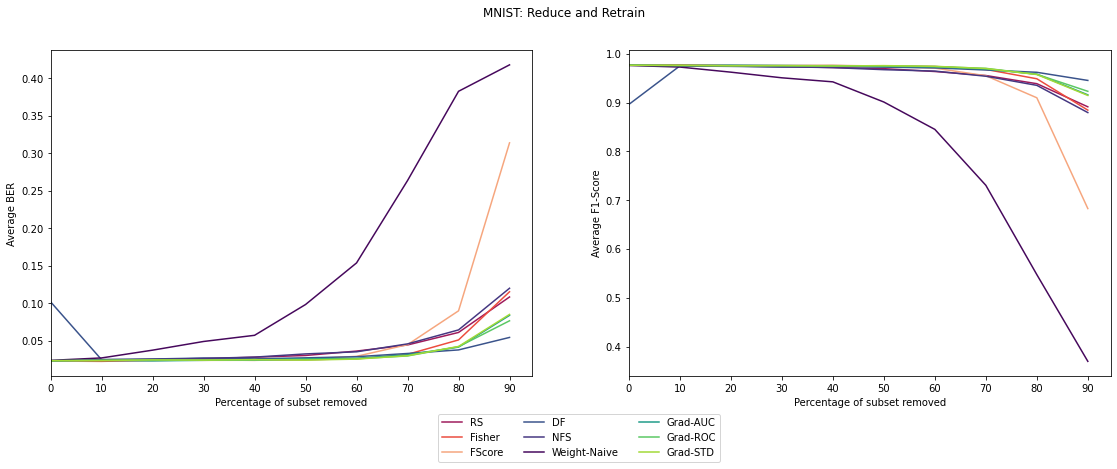

In [17]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
for i in ber_dictionary_average_plt.keys():
    plt.plot( np.flip(ber_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

plt.subplot(1,2,2)
for i in cr_dictionary_average_plt.keys():
    plt.plot( np.flip(cr_dictionary_average_plt[i]),color=colour[i] )
    
# plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.legend([j for i, j in name_set], ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.ylabel("Average F1-Score")
plt.xlabel("Percentage of subset removed")
plt.xlim(0)
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])

plt.suptitle("MNIST: Reduce and Retrain")


In [7]:
[j for i, j in name_set]

['Fisher',
 'FScore',
 'RS',
 'DF',
 'NFS',
 'Weight-Naive',
 'Grad-AUC',
 'Grad-ROC',
 'Grad-STD',
 'Grad-COV']

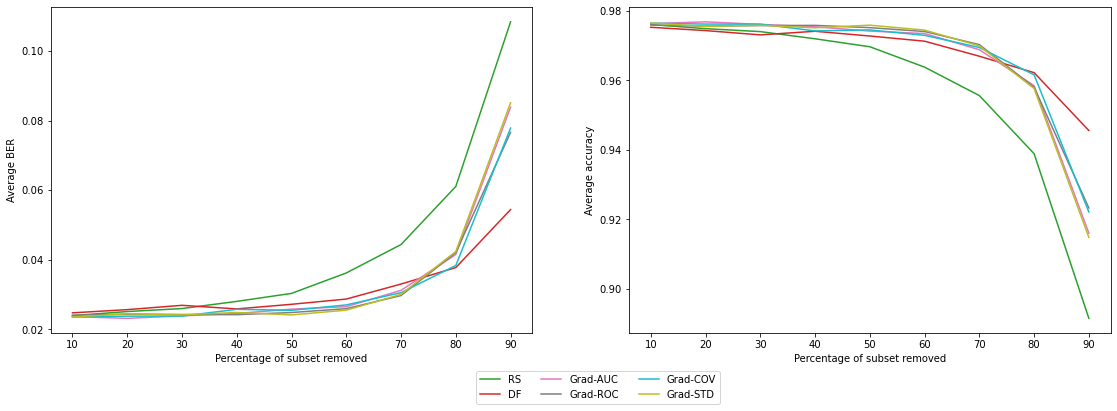

In [33]:
plt.figure(figsize=(19,6))
plt.subplot(1,2,1)
for i in ber_dictionary_average_plt.keys():
    plt.plot( np.flip(ber_dictionary_average_plt[i]),color=palette[colour[i]] )
    
# plt.legend(ber_dictionary_average_plt.keys(), ncol=3, loc=2)
plt.ylabel("Average BER")
plt.xlabel("Percentage of subset removed")
# _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])
# dictionary_average_sns

plt.subplot(1,2,2)
for i in cr_dictionary_average_plt.keys():
    plt.plot( np.flip(cr_dictionary_average_plt[i]),color=palette[colour[i]] )
    
plt.legend(cr_dictionary_average_plt.keys(), ncol=3, bbox_to_anchor=(0.2,-0.1))
plt.ylabel("Average accuracy")
plt.xlabel("Percentage of subset removed")
# _=plt.xticks([i for i in range(7)],[i for i in range(70,0,-10)])
_=plt.xticks([i for i in range(0,len(for_range))],[i for i in reversed(for_range)])


In [8]:
import pandas as pd

plots=[]
for key, value in dictionary_average_sns.items():
    run=0
    data=[]
    for r in value:
        percentage=len(for_range)*10
        for p in r:
            data.append([run, percentage, p, key])
            percentage -= 10
        run += 1
    plots.append(pd.DataFrame(data, columns=['run', 'percentage', 'value', "method"]) )
# plot=pd.DataFrame(data, columns=['run', 'percentage', 'value'])
# plot

In [348]:
# plots= pd.concat(plots)
# plots

Text(0, 0.5, 'BER')

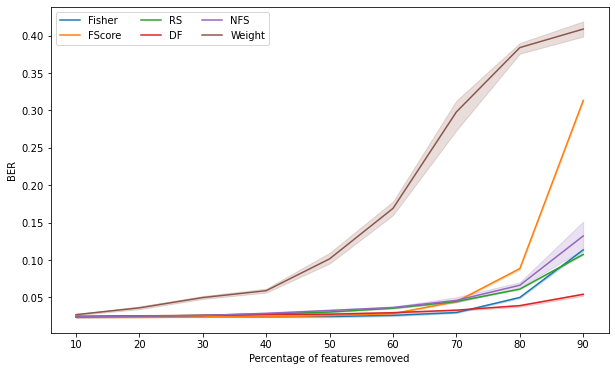

In [9]:
# legend_dict= {"Simul":"IE-Weight", "ThresholdedSimul":"IE-Weight-Thresholded", 
#               "RS":"RandomSelection", "DF":"DeepFeature", 
#               "Fisher":"FisherScore", "FScore":"FScore", 
#               "Grad-sum":"IE-Grad-sum", "Grad-std":"IE-Grad-std"}

# legend=[]
# for i in dictionary_average_plt.keys():
#     legend.append(legend_dict[i])

import seaborn as sns
import pandas as pd

plt.figure(figsize=(10,6))

for i, c in zip(plots, [palette[colour[i]] for i in [z[1] for z in model_list]]):
    sns.lineplot(data=i, x='percentage', y='value', color=c)
# sns.lineplot(data=plots, x='percentage', y='value')
# sns.lineplot(data=plot1, x='percentage', y='value', sort=False )
# _=plt.xticks([i for i in range(10,80,10)],[i for i in range(70,0,-10)])
# plt.legend(dictionary_average_plt.keys(), ncol=4)
plt.legend(dictionary_average_plt.keys(), ncol=3, loc=2)
# plt.legend(legend)
plt.xlabel("Percentage of features removed")
plt.ylabel("BER")


## Ranking of Feature

In [12]:
import pickle
import numpy as np
grads= pickle.load(open("./experiments/MNIST/exp_log4/Grad/list/MNIST-Grad-list-100.pkl", "rb"))
grad_all= np.array(grads).reshape(100,-1,784)
grad_all.shape

(100, 235, 784)

In [32]:
epoch_mean=[]
epoch_std=[]
epoch_sum=[]

for epoch in grad_all:
    epoch_mean.append( epoch.mean(axis=0) )
    epoch_std.append( epoch.std(axis=0) )
    epoch_sum.append( epoch.sum(axis=0) )
    
epoch_mean= np.array(epoch_mean)
epoch_std= np.array(epoch_std)
epoch_sum= np.array(epoch_sum)

In [33]:
channels= np.arange(784)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

## AUC

In [85]:
dictionary={}
for idx, name in zip(range(len(channels)), channels):
    dictionary[name]= np.trapz(abs(epoch_sum[:, idx]))

def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)[:10]

[(630, 20193.22),
 (294, 19115.982),
 (321, 18040.395),
 (631, 17691.678),
 (349, 16705.412),
 (575, 16505.732),
 (603, 16211.373),
 (628, 14936.547),
 (602, 14744.377),
 (600, 14462.52)]

In [94]:
auc= np.array(list(dictionary.values()))

In [102]:
q= np.percentile(list(dictionary.values()), [20])

In [99]:
auc[auc > q].shape, auc.shape

((627,), (784,))

In [100]:
784-78*2

628

Text(0.5, 1.0, 'AUC')

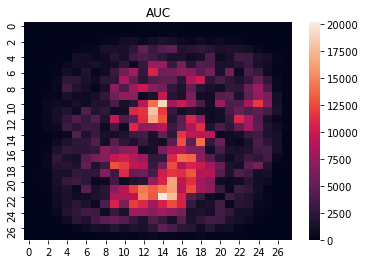

In [41]:
sns.heatmap(pd.DataFrame(np.array(list(dictionary.values())).reshape(28,28)))
plt.title("AUC")

## Rate of Change

In [139]:
dictionary={}
for i in range(len(channels)):
    rolled= np.roll( epoch_sum[:, i], 1 )
    rolled[0]=0.
    diff= epoch_sum[:, i]-rolled
    dictionary[channels[i]]= np.trapz(abs(diff))

In [120]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)[-10:]

[(754, 0.0),
 (755, 0.0),
 (756, 0.0),
 (757, 0.0),
 (758, 0.0),
 (759, 0.0),
 (780, 0.0),
 (781, 0.0),
 (782, 0.0),
 (783, 0.0)]

In [141]:
np.percentile(list(dictionary.values()), [10,20,30,40,50])

array([3.84474192e-03, 1.47007139e+00, 9.35964832e+00, 3.65804390e+01,
       7.53069954e+01])

In [146]:
q= np.percentile(list(dictionary.values()), [10])

In [142]:
roc= np.array(list(dictionary.values()))

In [147]:
roc[roc>q].shape, cov.shape

((705,), (784,))

In [145]:
392/784

0.5

Text(0.5, 1.0, 'Rate of Change')

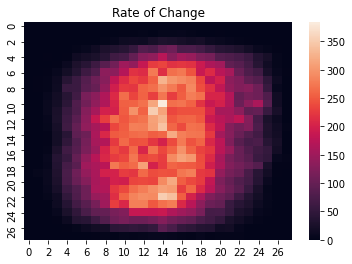

In [36]:
sns.heatmap(pd.DataFrame(np.array(list(dictionary.values())).reshape(28,28)))
plt.title("Rate of Change")

## Covariance

In [150]:
def process_cov(array, threshold, channels, dictionary={}, transpose=True):

    for i in channels:
        dictionary[i]=0
    
    i=0; j=0; 
    print("Threshold: ", threshold)
    print()
    
    if transpose:
        array= array.T
    
    for row in np.where( abs(np.cov(array)) > threshold, np.cov(array), 0):
        for column in row:
#             print("j", j, "i", i)
#             print("skip_condition", skip_condition)
#             print()
            if j==i:
                break

            if abs(column) > threshold and column != 1:
                print(f"cov: {round(column,3)}, {channels[i]} {channels[j]}")
                dictionary[channels[i]] += abs(column)
                dictionary[channels[j]] += abs(column)
            j+=1
        i+=1
        j=0
        
    return dictionary

dictionary= process_cov(epoch_sum, abs(np.cov(epoch_sum.T )).mean(), channels)

Threshold:  100.08555777673268

cov: 107.891, 96 70
cov: 109.548, 96 92
cov: 104.805, 96 94
cov: 218.445, 96 95
cov: 172.934, 97 95
cov: 236.981, 97 96
cov: 172.673, 98 95
cov: 216.763, 98 96
cov: 170.294, 98 97
cov: 143.195, 99 70
cov: 110.273, 99 71
cov: 127.802, 99 74
cov: 156.589, 99 92
cov: 135.305, 99 93
cov: 141.079, 99 94
cov: 307.48, 99 95
cov: 369.05, 99 96
cov: 291.29, 99 97
cov: 295.671, 99 98
cov: 179.527, 100 95
cov: 209.25, 100 96
cov: 163.438, 100 97
cov: 171.001, 100 98
cov: 316.814, 100 99
cov: 187.491, 101 95
cov: 218.275, 101 96
cov: 172.997, 101 97
cov: 175.954, 101 98
cov: 330.854, 101 99
cov: 199.104, 101 100
cov: 158.488, 102 95
cov: 187.121, 102 96
cov: 149.278, 102 97
cov: 147.84, 102 98
cov: 278.249, 102 99
cov: 166.068, 102 100
cov: 175.668, 102 101
cov: 133.311, 103 95
cov: 159.742, 103 96
cov: 125.291, 103 97
cov: 126.88, 103 98
cov: 234.758, 103 99
cov: 138.733, 103 100
cov: 145.222, 103 101
cov: 122.378, 103 102
cov: 100.785, 104 96
cov: 152.322, 104 99


cov: 200.803, 245 156
cov: 109.786, 245 158
cov: -197.552, 245 159
cov: 162.782, 245 178
cov: 159.588, 245 179
cov: 210.692, 245 181
cov: 195.188, 245 182
cov: 188.038, 245 183
cov: 149.657, 245 185
cov: 196.828, 245 206
cov: 246.119, 245 207
cov: 132.653, 245 208
cov: 190.767, 245 209
cov: 370.917, 245 210
cov: 277.025, 245 211
cov: 175.056, 245 212
cov: 237.543, 245 213
cov: 170.155, 245 214
cov: 103.162, 245 233
cov: 138.664, 245 234
cov: 204.792, 245 235
cov: 190.923, 245 236
cov: 138.363, 245 237
cov: 112.077, 245 238
cov: 183.143, 245 239
cov: 267.964, 245 241
cov: -105.747, 246 154
cov: -140.289, 246 210
cov: -110.976, 246 211
cov: -120.83, 246 241
cov: 144.684, 247 96
cov: 114.384, 247 97
cov: 106.414, 247 98
cov: 160.075, 247 99
cov: 114.83, 247 123
cov: 102.523, 247 124
cov: 154.789, 247 126
cov: 112.462, 247 134
cov: 114.584, 247 135
cov: -253.519, 247 153
cov: -271.503, 247 154
cov: -129.357, 247 155
cov: -224.849, 247 156
cov: 192.021, 247 159
cov: -156.396, 247 178
cov: -

cov: 1198.801, 322 126
cov: 120.867, 322 127
cov: 629.433, 322 128
cov: 226.451, 322 129
cov: 104.806, 322 130
cov: -136.191, 322 131
cov: 298.145, 322 132
cov: 658.897, 322 133
cov: 771.105, 322 134
cov: 822.806, 322 135
cov: 472.544, 322 136
cov: 371.785, 322 137
cov: 128.788, 322 144
cov: 312.92, 322 145
cov: 111.964, 322 146
cov: 515.172, 322 147
cov: 460.65, 322 148
cov: 493.53, 322 149
cov: 254.542, 322 150
cov: 261.682, 322 151
cov: -319.283, 322 152
cov: -1701.273, 322 153
cov: -1881.215, 322 154
cov: -976.304, 322 155
cov: -1591.303, 322 156
cov: -295.602, 322 157
cov: -716.026, 322 158
cov: 1431.367, 322 159
cov: 507.95, 322 160
cov: 622.048, 322 161
cov: 589.448, 322 162
cov: 616.652, 322 163
cov: 487.088, 322 164
cov: 232.128, 322 165
cov: 137.678, 322 172
cov: 250.243, 322 173
cov: 390.8, 322 174
cov: 179.139, 322 175
cov: 170.692, 322 176
cov: -429.473, 322 177
cov: -1106.248, 322 178
cov: -1375.798, 322 179
cov: -1468.065, 322 181
cov: -1410.366, 322 182
cov: -1310.367, 

cov: -190.181, 353 256
cov: 130.711, 353 259
cov: 597.169, 353 261
cov: 446.786, 353 262
cov: 987.399, 353 263
cov: 432.816, 353 265
cov: -1005.168, 353 266
cov: 313.01, 353 268
cov: -139.736, 353 269
cov: 175.119, 353 271
cov: -134.556, 353 272
cov: -702.105, 353 273
cov: -414.286, 353 274
cov: -278.661, 353 275
cov: -539.3, 353 276
cov: -342.847, 353 277
cov: -439.689, 353 285
cov: -292.634, 353 286
cov: -370.011, 353 287
cov: -550.571, 353 288
cov: 840.282, 353 289
cov: 553.242, 353 290
cov: 723.957, 353 291
cov: -717.345, 353 292
cov: -2286.925, 353 293
cov: -2871.514, 353 294
cov: -1006.929, 353 295
cov: -630.825, 353 296
cov: -517.784, 353 297
cov: -458.632, 353 298
cov: -316.32, 353 299
cov: -752.708, 353 300
cov: -209.463, 353 301
cov: -539.384, 353 302
cov: -1110.067, 353 303
cov: -1387.012, 353 304
cov: -514.69, 353 305
cov: -120.34, 353 306
cov: -160.416, 353 311
cov: -375.577, 353 312
cov: -293.001, 353 313
cov: -565.232, 353 314
cov: 159.445, 353 317
cov: 404.743, 353 318


cov: 335.59, 401 241
cov: 129.567, 401 243
cov: -119.338, 401 248
cov: 140.87, 401 261
cov: 102.462, 401 262
cov: 207.647, 401 263
cov: -207.775, 401 266
cov: -166.279, 401 273
cov: -134.911, 401 276
cov: -102.37, 401 288
cov: 181.971, 401 289
cov: 123.55, 401 290
cov: 160.596, 401 291
cov: -201.77, 401 292
cov: -543.831, 401 293
cov: -652.155, 401 294
cov: -241.678, 401 295
cov: -143.35, 401 296
cov: -111.552, 401 297
cov: -189.258, 401 300
cov: -122.918, 401 302
cov: -253.684, 401 303
cov: -312.813, 401 304
cov: -114.529, 401 305
cov: -136.799, 401 314
cov: 121.759, 401 318
cov: -209.654, 401 319
cov: -418.037, 401 320
cov: -647.701, 401 321
cov: -510.442, 401 322
cov: -107.332, 401 325
cov: -118.949, 401 329
cov: -183.675, 401 330
cov: -185.771, 401 331
cov: -270.767, 401 332
cov: -145.566, 401 333
cov: -114.119, 401 340
cov: -135.739, 401 341
cov: -412.876, 401 345
cov: -157.475, 401 347
cov: -325.542, 401 348
cov: -511.532, 401 349
cov: -427.113, 401 350
cov: 388.672, 401 353
cov:

cov: -260.417, 436 418
cov: -217.899, 436 423
cov: -497.118, 436 424
cov: -360.995, 436 425
cov: -378.169, 436 426
cov: 463.774, 436 428
cov: -1344.203, 436 429
cov: -808.844, 436 430
cov: 520.644, 436 431
cov: 733.699, 436 432
cov: 441.846, 436 434
cov: 571.923, 436 435
cov: -105.221, 437 66
cov: -121.28, 437 67
cov: -141.367, 437 69
cov: -246.282, 437 70
cov: -191.54, 437 71
cov: -125.6, 437 72
cov: -147.849, 437 73
cov: -224.015, 437 74
cov: -267.402, 437 92
cov: -230.331, 437 93
cov: -237.359, 437 94
cov: -531.078, 437 95
cov: -621.848, 437 96
cov: -495.732, 437 97
cov: -493.136, 437 98
cov: -926.0, 437 99
cov: -547.106, 437 100
cov: -580.296, 437 101
cov: -493.935, 437 102
cov: -405.638, 437 103
cov: -267.13, 437 104
cov: -242.864, 437 105
cov: -156.496, 437 106
cov: -141.402, 437 107
cov: -139.066, 437 117
cov: -187.24, 437 118
cov: -130.766, 437 119
cov: -281.953, 437 120
cov: -323.967, 437 121
cov: -392.607, 437 122
cov: -624.937, 437 123
cov: -381.756, 437 124
cov: -491.311, 4

cov: 2227.266, 463 436
cov: 1541.483, 463 437
cov: 2054.44, 463 438
cov: 554.099, 463 440
cov: -136.704, 463 442
cov: -268.911, 463 443
cov: -730.774, 463 444
cov: -340.725, 463 445
cov: -115.664, 463 446
cov: -293.738, 463 451
cov: -585.477, 463 452
cov: -528.197, 463 453
cov: -226.149, 463 454
cov: -604.685, 463 455
cov: -1459.809, 463 456
cov: -1623.894, 463 457
cov: -1267.402, 463 458
cov: -1855.012, 463 459
cov: -353.76, 463 460
cov: 303.252, 463 461
cov: 946.07, 463 462
cov: -135.586, 464 66
cov: -148.698, 464 67
cov: -177.466, 464 69
cov: -292.132, 464 70
cov: -213.379, 464 71
cov: -135.985, 464 72
cov: -154.832, 464 73
cov: -248.467, 464 74
cov: -120.92, 464 91
cov: -300.623, 464 92
cov: -245.067, 464 93
cov: -285.779, 464 94
cov: -597.586, 464 95
cov: -777.281, 464 96
cov: -636.518, 464 97
cov: -583.064, 464 98
cov: -1026.076, 464 99
cov: -587.795, 464 100
cov: -615.094, 464 101
cov: -527.276, 464 102
cov: -445.949, 464 103
cov: -280.246, 464 104
cov: -298.385, 464 105
cov: -1

cov: -166.787, 490 219
cov: -102.796, 490 220
cov: -179.624, 490 221
cov: -248.422, 490 228
cov: -153.179, 490 229
cov: 161.239, 490 232
cov: 321.292, 490 233
cov: 409.77, 490 234
cov: 700.719, 490 235
cov: 600.221, 490 236
cov: 377.414, 490 237
cov: 333.067, 490 238
cov: 544.509, 490 239
cov: 166.757, 490 240
cov: 758.648, 490 241
cov: 293.323, 490 243
cov: -225.076, 490 244
cov: 174.871, 490 245
cov: -158.104, 490 247
cov: -273.06, 490 248
cov: -202.306, 490 249
cov: -111.461, 490 256
cov: 305.012, 490 261
cov: 244.882, 490 262
cov: 573.225, 490 263
cov: 262.134, 490 265
cov: -534.796, 490 266
cov: 192.61, 490 268
cov: -400.452, 490 273
cov: -246.907, 490 274
cov: -133.255, 490 275
cov: -274.518, 490 276
cov: -167.411, 490 277
cov: -259.45, 490 285
cov: -185.864, 490 286
cov: -205.132, 490 287
cov: -330.793, 490 288
cov: 499.503, 490 289
cov: 354.943, 490 290
cov: 464.253, 490 291
cov: -395.555, 490 292
cov: -1291.678, 490 293
cov: -1598.059, 490 294
cov: -571.183, 490 295
cov: -319.

cov: 248.41, 515 397
cov: 110.764, 515 399
cov: -149.822, 515 401
cov: -292.486, 515 402
cov: -154.108, 515 404
cov: -162.775, 515 405
cov: -675.376, 515 406
cov: -336.291, 515 407
cov: -732.774, 515 408
cov: -843.243, 515 409
cov: -565.756, 515 410
cov: -366.102, 515 411
cov: 117.38, 515 414
cov: 166.42, 515 415
cov: 253.841, 515 416
cov: 133.409, 515 417
cov: 145.663, 515 424
cov: 127.163, 515 425
cov: 135.054, 515 426
cov: 358.686, 515 429
cov: 208.553, 515 430
cov: -149.19, 515 431
cov: -188.293, 515 432
cov: -203.495, 515 435
cov: -1009.216, 515 436
cov: -599.235, 515 437
cov: -979.534, 515 438
cov: -295.191, 515 440
cov: 129.55, 515 443
cov: 331.878, 515 444
cov: 170.988, 515 445
cov: 137.882, 515 451
cov: 254.711, 515 452
cov: 225.247, 515 453
cov: 155.84, 515 454
cov: 272.166, 515 455
cov: 636.561, 515 456
cov: 679.757, 515 457
cov: 574.503, 515 458
cov: 782.924, 515 459
cov: 130.429, 515 460
cov: -176.282, 515 461
cov: -440.816, 515 462
cov: -697.059, 515 463
cov: -848.927, 51

cov: 303.753, 540 332
cov: 182.901, 540 333
cov: 142.368, 540 340
cov: 202.062, 540 341
cov: 109.239, 540 343
cov: 440.718, 540 345
cov: 122.02, 540 346
cov: 178.116, 540 347
cov: 437.384, 540 348
cov: 544.984, 540 349
cov: 378.797, 540 350
cov: -440.555, 540 353
cov: -354.832, 540 354
cov: 363.322, 540 358
cov: 272.636, 540 359
cov: 177.952, 540 360
cov: 157.784, 540 368
cov: 144.069, 540 369
cov: 108.576, 540 370
cov: 157.99, 540 371
cov: 139.684, 540 375
cov: 209.093, 540 376
cov: -115.964, 540 378
cov: -184.789, 540 380
cov: -412.848, 540 381
cov: -516.481, 540 382
cov: 174.522, 540 386
cov: 184.595, 540 387
cov: 201.788, 540 388
cov: 149.687, 540 397
cov: -191.04, 540 402
cov: -106.767, 540 405
cov: -418.391, 540 406
cov: -217.471, 540 407
cov: -437.471, 540 408
cov: -516.076, 540 409
cov: -343.22, 540 410
cov: -221.819, 540 411
cov: 103.16, 540 415
cov: 151.984, 540 416
cov: 212.407, 540 429
cov: 128.213, 540 430
cov: -123.526, 540 435
cov: -613.605, 540 436
cov: -350.008, 540 43

cov: -249.521, 554 495
cov: 226.288, 554 499
cov: 191.112, 554 500
cov: 183.26, 554 501
cov: 144.891, 554 507
cov: 111.056, 554 508
cov: 203.319, 554 510
cov: 250.544, 554 511
cov: 406.32, 554 512
cov: 792.638, 554 513
cov: 450.682, 554 514
cov: 321.363, 554 515
cov: 203.451, 554 516
cov: 201.924, 554 517
cov: -241.139, 554 518
cov: -849.098, 554 519
cov: -622.716, 554 520
cov: -426.635, 554 521
cov: -557.256, 554 522
cov: -561.659, 554 523
cov: -359.578, 554 524
cov: -230.513, 554 525
cov: 276.997, 554 527
cov: 257.26, 554 528
cov: 158.373, 554 537
cov: 197.869, 554 540
cov: 117.927, 554 541
cov: 584.029, 554 542
cov: 336.857, 554 543
cov: 491.856, 554 544
cov: -747.179, 554 546
cov: -369.564, 554 547
cov: -579.307, 554 548
cov: -655.45, 554 549
cov: -703.319, 554 550
cov: -607.679, 554 551
cov: -325.813, 554 552
cov: -175.416, 554 553
cov: 125.305, 555 95
cov: 161.395, 555 96
cov: 130.973, 555 97
cov: 120.844, 555 98
cov: 215.058, 555 99
cov: 123.042, 555 100
cov: 129.736, 555 101
co

cov: 133.633, 585 322
cov: 101.445, 585 345
cov: 118.847, 585 349
cov: -112.352, 585 382
cov: -107.7, 585 409
cov: -134.766, 585 436
cov: -126.866, 585 438
cov: 111.893, 585 459
cov: -110.823, 585 464
cov: -101.305, 585 492
cov: -108.664, 585 493
cov: 109.156, 585 513
cov: -117.271, 585 519
cov: -103.117, 585 546
cov: -105.475, 585 575
cov: -104.373, 585 577
cov: -126.645, 591 153
cov: -146.144, 591 154
cov: -113.308, 591 156
cov: 108.546, 591 159
cov: -110.309, 591 181
cov: -107.339, 591 182
cov: -100.747, 591 183
cov: -109.239, 591 206
cov: -133.482, 591 207
cov: -108.822, 591 209
cov: -197.344, 591 210
cov: -155.324, 591 211
cov: -129.395, 591 213
cov: -118.005, 591 235
cov: -104.289, 591 236
cov: -137.695, 591 241
cov: 233.224, 591 293
cov: 285.179, 591 294
cov: 102.192, 591 295
cov: 109.674, 591 303
cov: 135.261, 591 304
cov: 101.419, 591 319
cov: 178.122, 591 320
cov: 267.49, 591 321
cov: 224.748, 591 322
cov: 119.873, 591 332
cov: 178.406, 591 345
cov: 146.448, 591 348
cov: 209.

cov: -409.938, 604 473
cov: -139.519, 604 474
cov: -358.26, 604 479
cov: -309.046, 604 480
cov: -428.024, 604 481
cov: -410.579, 604 482
cov: -998.413, 604 483
cov: -1306.652, 604 484
cov: -1108.776, 604 485
cov: -1460.931, 604 486
cov: -1267.797, 604 487
cov: -1081.002, 604 488
cov: 305.279, 604 489
cov: 1019.951, 604 490
cov: 1122.659, 604 491
cov: 1795.031, 604 492
cov: 1917.3, 604 493
cov: 937.73, 604 494
cov: 635.365, 604 495
cov: 142.512, 604 496
cov: -103.245, 604 498
cov: -539.982, 604 499
cov: -480.778, 604 500
cov: -427.887, 604 501
cov: -354.877, 604 507
cov: -282.946, 604 508
cov: -489.428, 604 510
cov: -616.967, 604 511
cov: -1021.163, 604 512
cov: -1965.502, 604 513
cov: -1070.197, 604 514
cov: -722.928, 604 515
cov: -495.738, 604 516
cov: -565.503, 604 517
cov: 543.812, 604 518
cov: 2106.789, 604 519
cov: 1660.613, 604 520
cov: 1072.129, 604 521
cov: 1398.338, 604 522
cov: 1414.284, 604 523
cov: 943.426, 604 524
cov: 597.09, 604 525
cov: 109.614, 604 526
cov: -639.38, 60

cov: -469.978, 628 160
cov: -581.546, 628 161
cov: -550.141, 628 162
cov: -571.532, 628 163
cov: -449.359, 628 164
cov: -212.526, 628 165
cov: -127.036, 628 172
cov: -237.722, 628 173
cov: -368.397, 628 174
cov: -169.25, 628 175
cov: -160.628, 628 176
cov: 389.225, 628 177
cov: 1034.688, 628 178
cov: 1254.19, 628 179
cov: 1381.828, 628 181
cov: 1301.289, 628 182
cov: 1218.664, 628 183
cov: 217.976, 628 184
cov: 993.687, 628 185
cov: 361.892, 628 186
cov: 296.395, 628 187
cov: -567.742, 628 188
cov: 449.868, 628 189
cov: 152.192, 628 190
cov: -422.391, 628 191
cov: -320.112, 628 192
cov: -137.411, 628 193
cov: -117.103, 628 199
cov: -372.414, 628 200
cov: -235.273, 628 201
cov: -138.911, 628 202
cov: -131.832, 628 203
cov: 268.757, 628 204
cov: 217.876, 628 205
cov: 1385.341, 628 206
cov: 1593.105, 628 207
cov: 788.107, 628 208
cov: 1353.397, 628 209
cov: 2335.233, 628 210
cov: 1883.394, 628 211
cov: 1208.263, 628 212
cov: 1577.656, 628 213
cov: 1162.77, 628 214
cov: 249.968, 628 215
co

cov: -113.462, 652 528
cov: -195.378, 652 542
cov: -112.984, 652 543
cov: -166.094, 652 544
cov: 263.503, 652 546
cov: 181.334, 652 547
cov: 229.837, 652 548
cov: 223.693, 652 549
cov: 223.093, 652 550
cov: 238.64, 652 551
cov: 109.683, 652 552
cov: -101.984, 652 554
cov: 105.532, 652 573
cov: 202.796, 652 574
cov: 286.559, 652 575
cov: 167.503, 652 576
cov: 233.488, 652 577
cov: 167.467, 652 578
cov: 168.443, 652 579
cov: 102.788, 652 596
cov: 205.798, 652 597
cov: 191.082, 652 598
cov: 223.458, 652 599
cov: 267.368, 652 600
cov: 298.048, 652 601
cov: 227.745, 652 602
cov: 323.809, 652 603
cov: 194.034, 652 604
cov: 202.847, 652 605
cov: 147.066, 652 606
cov: 135.313, 652 607
cov: 143.382, 652 625
cov: 225.425, 652 626
cov: 181.547, 652 627
cov: 313.673, 652 628
cov: 259.97, 652 629
cov: 399.22, 652 630
cov: 367.532, 652 631
cov: 211.979, 652 632
cov: 114.644, 652 633
cov: -154.156, 653 70
cov: -115.084, 653 71
cov: -131.791, 653 74
cov: -164.846, 653 92
cov: -139.653, 653 93
cov: -15

cov: -140.773, 662 158
cov: 249.447, 662 159
cov: 117.068, 662 160
cov: 123.061, 662 161
cov: 113.448, 662 162
cov: 106.933, 662 163
cov: -196.425, 662 178
cov: -186.258, 662 179
cov: -248.199, 662 181
cov: -240.146, 662 182
cov: -230.024, 662 183
cov: -196.716, 662 185
cov: 130.232, 662 188
cov: -238.289, 662 206
cov: -320.773, 662 207
cov: -180.421, 662 208
cov: -244.844, 662 209
cov: -480.926, 662 210
cov: -358.482, 662 211
cov: -228.416, 662 212
cov: -277.481, 662 213
cov: -200.785, 662 214
cov: -116.23, 662 233
cov: -179.063, 662 234
cov: -256.398, 662 235
cov: -225.961, 662 236
cov: -150.137, 662 237
cov: -174.567, 662 238
cov: -249.226, 662 239
cov: -347.218, 662 241
cov: -129.693, 662 243
cov: -119.004, 662 261
cov: -209.152, 662 263
cov: -100.305, 662 265
cov: 171.195, 662 266
cov: -101.921, 662 268
cov: 145.262, 662 273
cov: 112.261, 662 288
cov: -188.667, 662 289
cov: -144.908, 662 290
cov: -188.671, 662 291
cov: 171.733, 662 292
cov: 508.059, 662 293
cov: 614.779, 662 294
c

cov: -136.101, 687 535
cov: -238.078, 687 537
cov: -140.233, 687 539
cov: -282.308, 687 540
cov: -185.987, 687 541
cov: -842.773, 687 542
cov: -439.006, 687 543
cov: -706.86, 687 544
cov: 1085.684, 687 546
cov: 554.26, 687 547
cov: 879.386, 687 548
cov: 981.175, 687 549
cov: 1011.627, 687 550
cov: 877.186, 687 551
cov: 483.963, 687 552
cov: 259.632, 687 553
cov: -443.85, 687 554
cov: -244.426, 687 555
cov: -101.191, 687 563
cov: -155.793, 687 564
cov: -406.242, 687 565
cov: -281.585, 687 566
cov: 145.607, 687 569
cov: 113.714, 687 570
cov: 539.118, 687 573
cov: 790.151, 687 574
cov: 1124.377, 687 575
cov: 719.477, 687 576
cov: 1134.175, 687 577
cov: 852.512, 687 578
cov: 596.033, 687 579
cov: 176.383, 687 580
cov: -271.348, 687 583
cov: -105.102, 687 591
cov: -118.157, 687 592
cov: -121.694, 687 593
cov: -381.145, 687 594
cov: 420.129, 687 596
cov: 806.45, 687 597
cov: 570.926, 687 598
cov: 1144.887, 687 599
cov: 1198.814, 687 600
cov: 1490.999, 687 601
cov: 874.274, 687 602
cov: 1488.

cov: 120.045, 710 229
cov: -139.934, 710 232
cov: -262.103, 710 233
cov: -299.967, 710 234
cov: -545.449, 710 235
cov: -465.62, 710 236
cov: -296.82, 710 237
cov: -190.89, 710 238
cov: -357.388, 710 239
cov: -120.178, 710 240
cov: -527.233, 710 241
cov: -208.709, 710 243
cov: 178.744, 710 244
cov: -124.205, 710 245
cov: 129.875, 710 247
cov: 211.282, 710 248
cov: 154.195, 710 249
cov: -262.078, 710 261
cov: -187.16, 710 262
cov: -420.102, 710 263
cov: -181.996, 710 265
cov: 427.504, 710 266
cov: -135.297, 710 268
cov: 295.793, 710 273
cov: 170.472, 710 274
cov: 117.246, 710 275
cov: 230.64, 710 276
cov: 145.356, 710 277
cov: 187.932, 710 285
cov: 122.627, 710 286
cov: 158.729, 710 287
cov: 235.584, 710 288
cov: -353.718, 710 289
cov: -221.241, 710 290
cov: -293.423, 710 291
cov: 296.52, 710 292
cov: 943.625, 710 293
cov: 1206.651, 710 294
cov: 419.958, 710 295
cov: 274.17, 710 296
cov: 229.673, 710 297
cov: 199.636, 710 298
cov: 126.284, 710 299
cov: 307.811, 710 300
cov: 222.588, 710 

cov: -196.61, 739 382
cov: -154.414, 739 406
cov: -171.171, 739 408
cov: -184.834, 739 409
cov: -137.385, 739 410
cov: -235.914, 739 436
cov: -151.566, 739 437
cov: -225.629, 739 438
cov: 150.359, 739 456
cov: 165.924, 739 457
cov: 130.368, 739 458
cov: 185.892, 739 459
cov: -100.81, 739 462
cov: -164.419, 739 463
cov: -188.058, 739 464
cov: -140.752, 739 465
cov: 119.273, 739 484
cov: 114.689, 739 485
cov: 144.678, 739 486
cov: 127.758, 739 487
cov: 101.899, 739 488
cov: -109.265, 739 491
cov: -178.822, 739 492
cov: -186.228, 739 493
cov: 186.021, 739 513
cov: 110.712, 739 514
cov: -202.665, 739 519
cov: -153.298, 739 520
cov: -103.432, 739 521
cov: -129.942, 739 522
cov: -135.287, 739 523
cov: 134.735, 739 542
cov: 114.852, 739 544
cov: -177.626, 739 546
cov: -148.332, 739 548
cov: -156.61, 739 549
cov: -161.517, 739 550
cov: -146.283, 739 551
cov: -134.338, 739 574
cov: -183.476, 739 575
cov: -118.82, 739 576
cov: -177.531, 739 577
cov: -138.232, 739 578
cov: -133.129, 739 597
cov: 

In [128]:
def dictionary_sort(x):
    return x[1]
sorted(dictionary.items(), key=dictionary_sort, reverse=True)[-10:]

[(773, 0),
 (775, 0),
 (776, 0),
 (777, 0),
 (778, 0),
 (779, 0),
 (780, 0),
 (781, 0),
 (782, 0),
 (783, 0)]

In [152]:
np.percentile(list(dictionary.values()), [10,20,30,40])

array([   0.        ,    0.        ,    0.        , 8293.47940034])

In [130]:
cov= np.array(list(dictionary.values()))

In [137]:
cov[cov>q].shape, cov.shape

((392,), (784,))

In [138]:
392/784

0.5

Text(0.5, 1.0, 'Covariance')

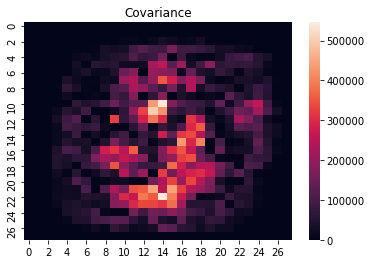

In [44]:
sns.heatmap(pd.DataFrame(np.array(list(dictionary.values())).reshape(28,28)))
plt.title("Covariance")

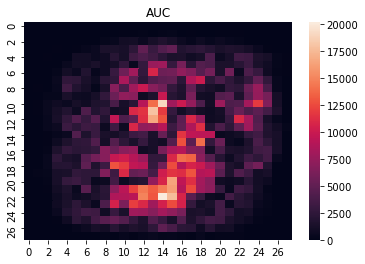
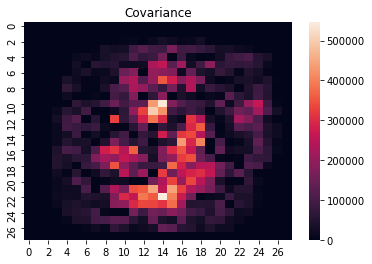

## std

In [34]:
# higher the better, by definition, std will be greater if value achieved is greater
std_dict={}
# plt.figure(figsize=(17,8))
for i, j in zip(range(len(channels)), channels):
#     plt.subplot(2,5,i+1)
    std= ( epoch_std[:,i] ) 
#     _= plt.plot( std )
    value= round( np.trapz(epoch_std[:, i]), 3 )# AuC
    std_dict[j]=value 
#     value= round((std.std() ), 3) 
#     plt.title(f"{j}: {str(value)}")

In [35]:
def dictionary_sort(x):
    return x[1]
sorted(std_dict.items(), key=dictionary_sort, reverse=True)[:10]

[(294, 0.853),
 (211, 0.816),
 (210, 0.811),
 (321, 0.811),
 (238, 0.806),
 (209, 0.803),
 (350, 0.794),
 (407, 0.792),
 (377, 0.789),
 (212, 0.785)]

Text(0.5, 1.0, 'Standard Deviation')

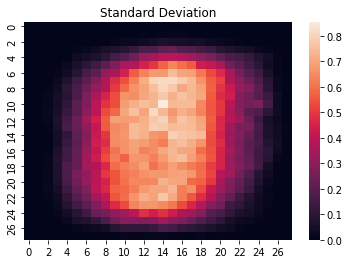

In [36]:
sns.heatmap(pd.DataFrame(np.array(list(std_dict.values())).reshape(28,28)))
plt.title("Standard Deviation")

## Coefficient of variation

In [84]:
# should follow higher the better - NOT RECOMMENDED

# high: high std relative to the mean
# low: low std relative to the mean <--consistent low std relative to mean

rstd_dict={}
# plt.figure(figsize=(17,8))
epoch_rstd= []
for i, j in zip(range(len(channels)), channels):
#     plt.subplot(2,5,i+1)
    if np.count_nonzero(epoch_mean[:,i])==0:
        rstd=np.array([0. for i in range(100)])
    else:
        rstd= epoch_std[:,i] / epoch_mean[:,i]# std-mean ratio per epochs

#     q1,q3= np.percentile(rstd, [10,90])
    
#     rstd= rstd[(rstd <= q3) & (rstd >= q1)] # removal of outlier, 20% 
    
    epoch_rstd.append(rstd)
#     _= plt.plot( rstd )
    value= round((rstd.var() ), 3) # Variance for the coef of variation, not as severely affected by outliers
#     value= round( np.trapz(abs(rstd)), 3 )# AuC, affected by outliers
    rstd_dict[j]=value
#     plt.title(f"{j}: {str(value)}")
    
epoch_rstd= np.array(epoch_rstd)

In [78]:
epoch_rstd.shape

(784, 100)

In [72]:
np.count_nonzero(epoch_mean[:,0])

0

In [82]:
def dictionary_sort(x):
    return x[1]
sorted(rstd_dict.items(), key=dictionary_sort, reverse=True)[:10]

[(570, 2394.826),
 (635, 1951.782),
 (198, 1776.206),
 (48, 790.726),
 (216, 547.165),
 (567, 443.741),
 (442, 284.093),
 (129, 212.624),
 (203, 168.615),
 (231, 168.382)]

Text(0.5, 1.0, 'Coefficient of variation')

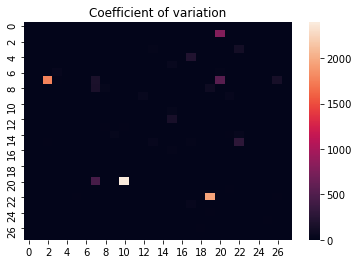

In [83]:
sns.heatmap(pd.DataFrame(np.array(list(rstd_dict.values())).reshape(28,28)))
plt.title("Coefficient of variation")

## Performance Retention

In [1]:
import pickle
import numpy as np

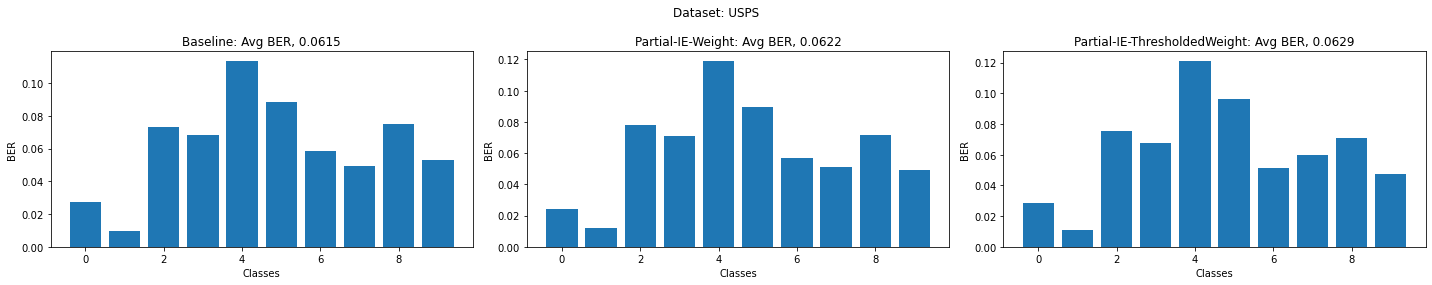

In [89]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

fig, axes= plt.subplots(1,3)
i=0; j=0
dataset= "USPS"
folder_dict={"Baseline":"Baseline", 
             "Phases-Weight":"Phases",
             "Phases-ThresholdedWeight":"Phases"} #model: folder

dict_name= {"Baseline":"Baseline", "Phases-Weight":"Partial-IE-Weight", "Phases-ThresholdedWeight":"Partial-IE-ThresholdedWeight"}

plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    axes[j].bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    axes[j].set_title(dict_name[model]+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    axes[j].set_xlabel("Classes")
    axes[j].set_ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

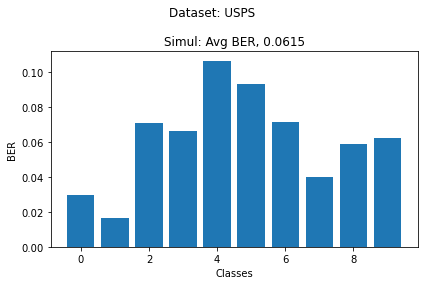

In [549]:
# Performance Retention
import matplotlib.pyplot as plt
import pickle
import numpy as np

# fig, axes= plt.subplots(1,3)
fig= plt.figure()
i=0; j=0
dataset= "USPS"
folder_dict={"Weight":"Weight"} #model: folder


plt.suptitle("Dataset: "+dataset )
# fig.set_figheight(15)
# fig.set_figwidth(20)

for model in folder_dict.keys():
    avg= []
    for folder in range(5):
        ber= pickle.load( open("./experiments/Benchmark/exp_log"+str(folder)+"/"+folder_dict[model]+"/benchmark-"+model+"-"+dataset+"-ber.pkl", "rb") )
#         print(ber)
        avg.append(ber)
    
    plt.bar([i for i in range(len(ber))], np.array(avg).mean(axis=0))
    plt.title(model+": Avg BER, "+str(round(np.array(avg).mean(),4)))
    plt.xlabel("Classes")
    plt.ylabel("BER")
    j += 1
plt.tight_layout()
#     axes[i][j].set_ylim([0, 0.7])

## Captum xAI methods

In [ ]:
import Models.MNISTBaseline_Model as Model
import Models.model_func as Model_Func
device= torch.device("cuda")

model= Model.MNISTBaseline_Model(device=device, input_dim=dataset_train[0][0].shape[0], classes=dataset_train.classes)
model.to(device)

In [ ]:
from utilities.MNISTDataset import MNISTDataset

dataset_train=MNISTDataset("TRAIN")
dataset_val=MNISTDataset("TEST")
classes=dataset_train.classes

In [ ]:
model.load_state_dict(f"./experiments/MNIST/exp_log{exp}/Baseline/state_dict/MNIST-Baseline-state_dict-100.pt")
model.load_state_dict(f"./experiments/MNIST/exp_log{exp}/DF/state_dict/MNIST-DF-state_dict-100.pt")
model.load_state_dict(f"./experiments/MNIST/exp_log{exp}/NFS/state_dict/MNIST-NFS-state_dict-100.pt")
model.load_state_dict(f"./experiments/MNIST/exp_log{exp}/Grad/state_dict/MNIST-Grad-state_dict-100.pt")

In [ ]:
from captum. import 